In [4]:
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
tstart = dt.datetime.now()
import numpy as np
import xarray as xr
# import wradlib as wrl
import pandas as pd
# from netCDF4 import Dataset
import glob
import os
import pyart
# import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import datetime as dt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeat
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import metpy.calc as mcal
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16
# plt.rcParams['image.cmap'] = 'seismic'
plt.rcParams['axes.linewidth'] = 2

## Cyclones Track Data (ibtracs)

In [5]:
import seaborn as sns
import tropycal.tracks as tracks
hurdat_atl = tracks.TrackDataset(basin='north_indian',source='ibtracs',include_btk=True)
storm = hurdat_atl.get_storm(('tauktae',2021))
track = storm.to_xarray().to_dataframe()
# track.index = track.index+pd.to_timedelta(330,unit='min')

--> Starting to read in ibtracs data
--> Completed reading in ibtracs data (8.95 seconds)


In [6]:
len(hurdat_atl.data.keys())

769

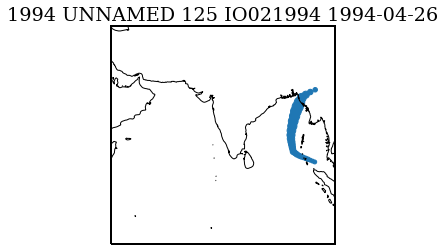

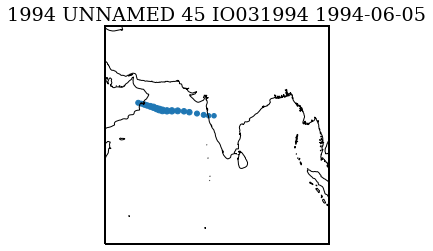

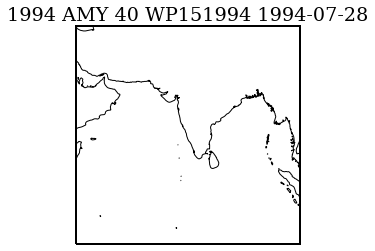

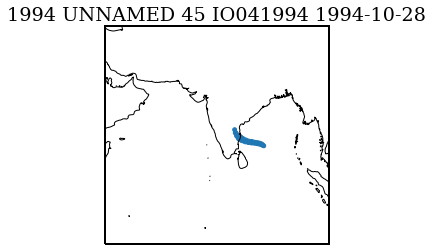

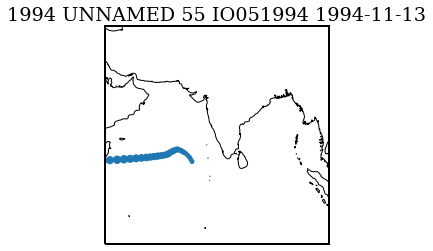

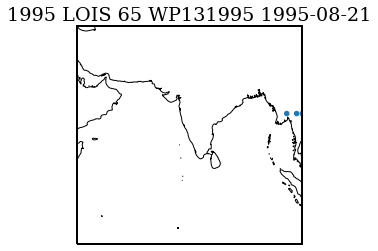

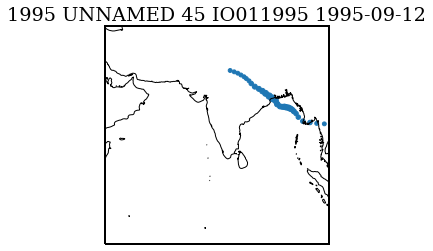

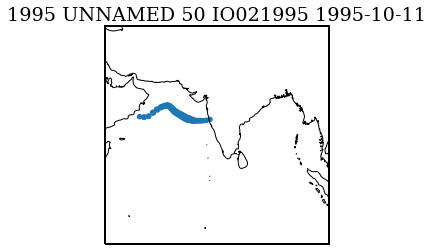

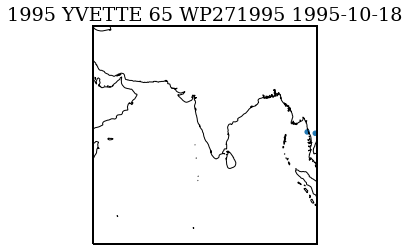

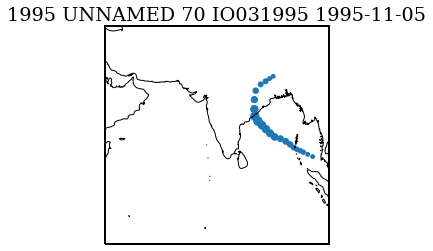

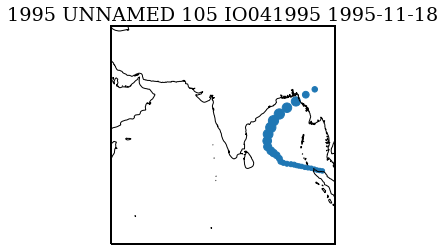

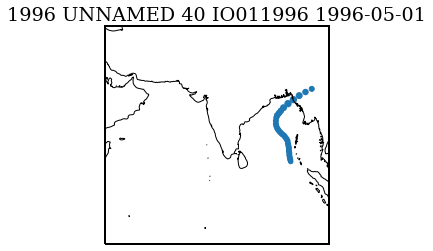

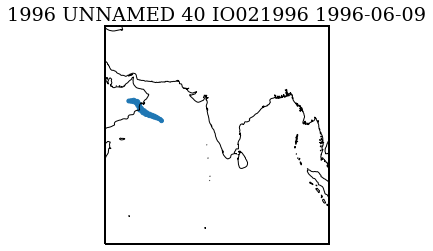

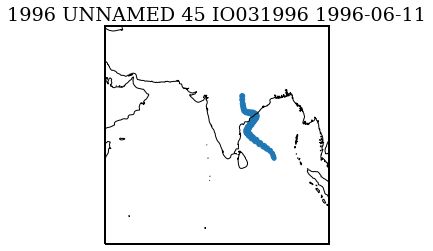

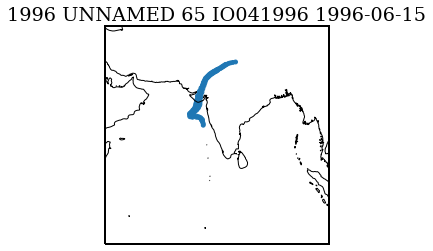

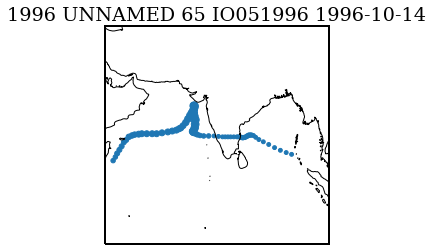

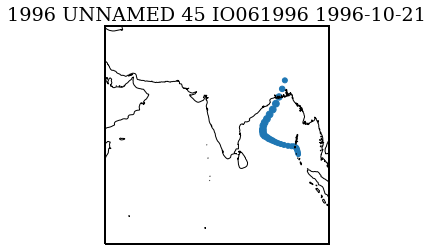

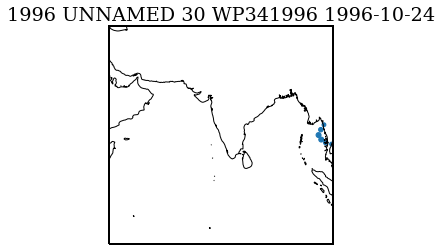

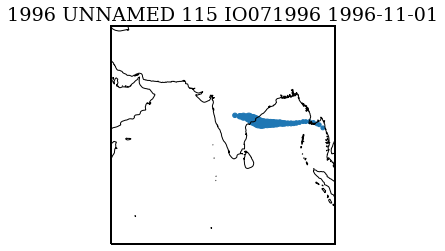

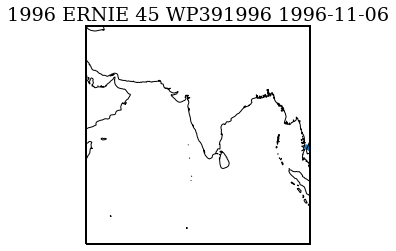

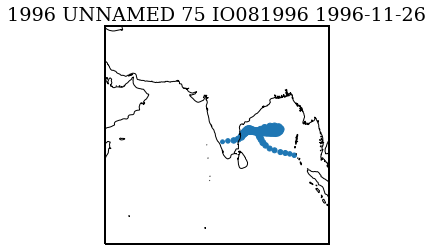

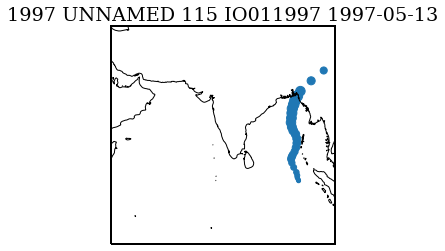

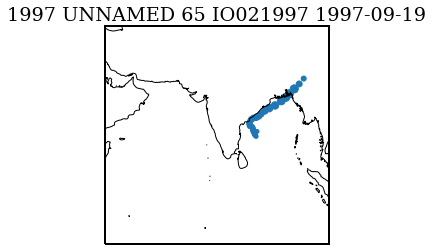

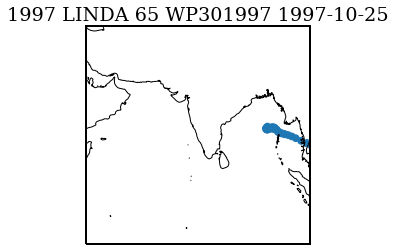

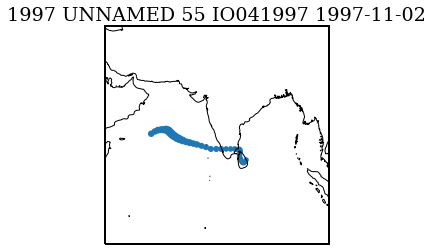

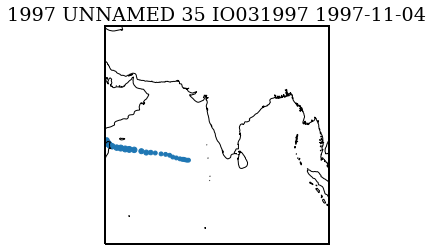

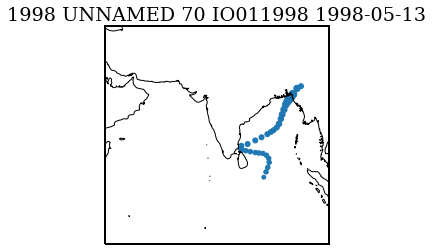

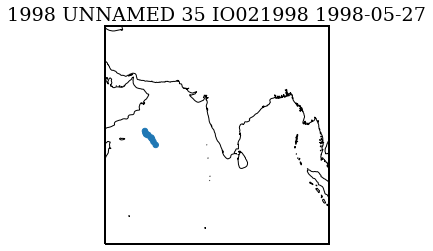

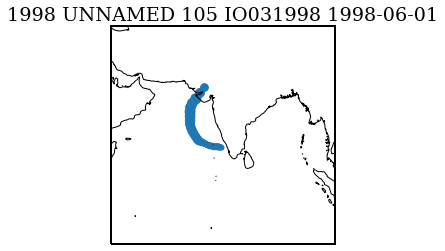

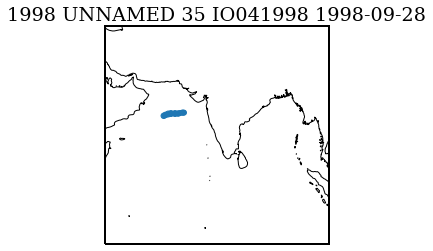

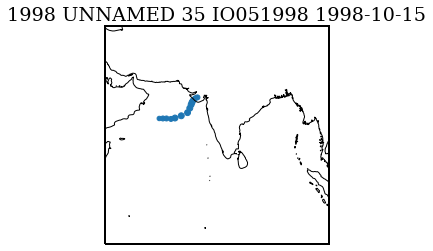

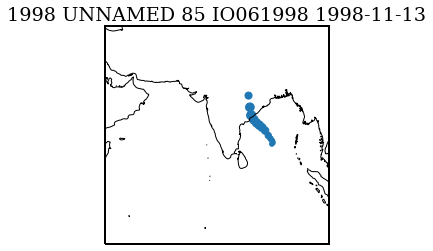

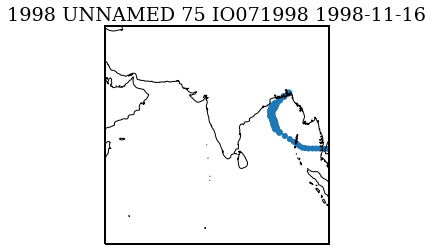

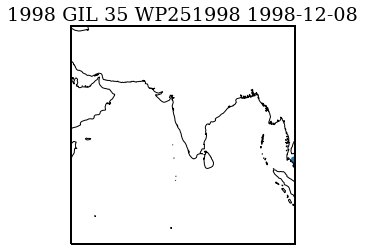

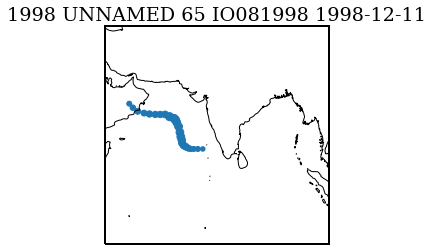

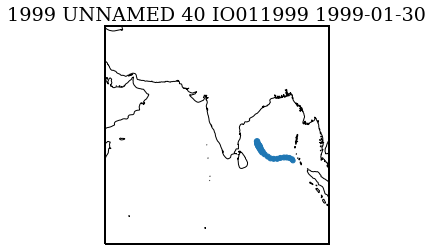

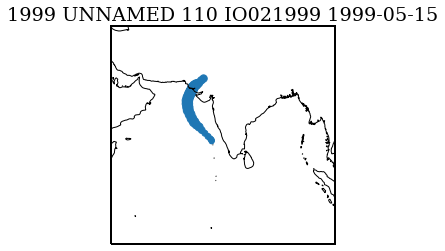

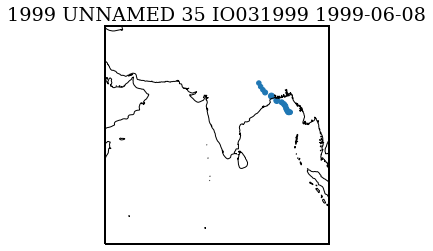

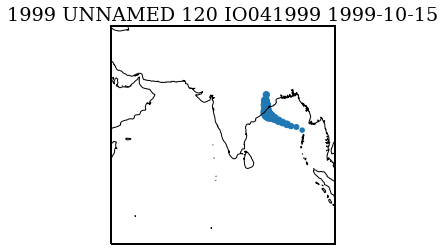

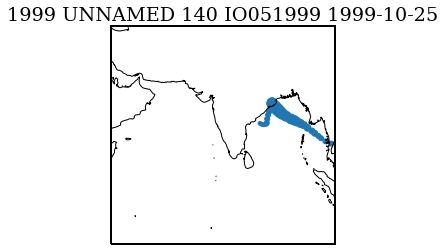

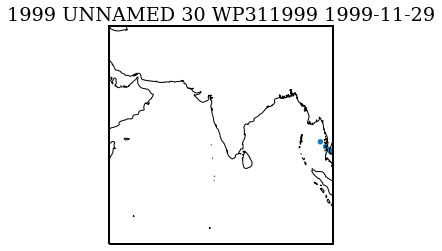

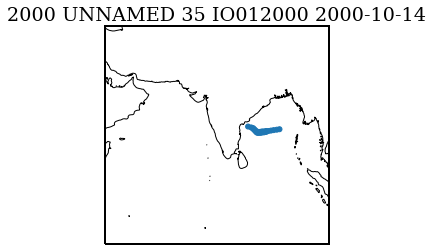

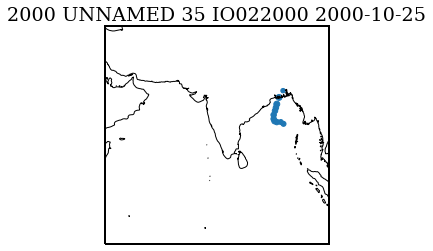

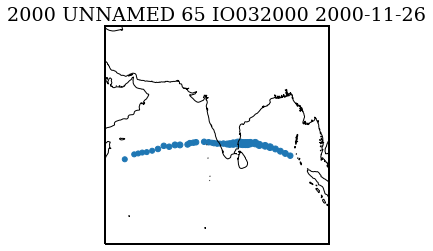

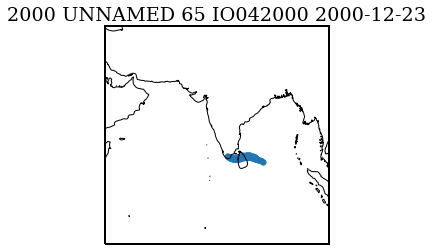

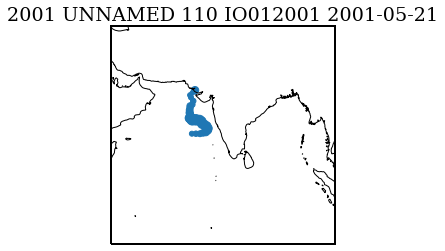

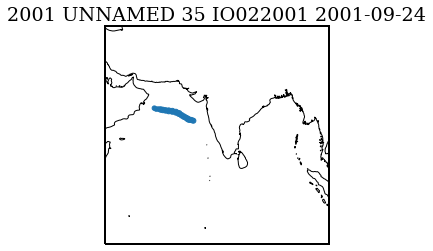

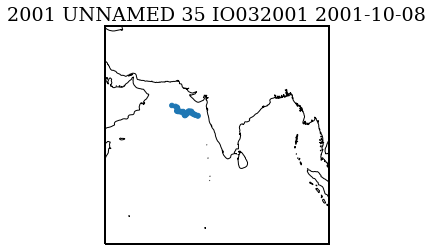

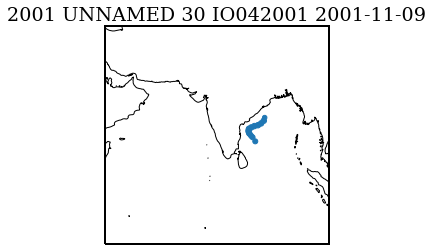

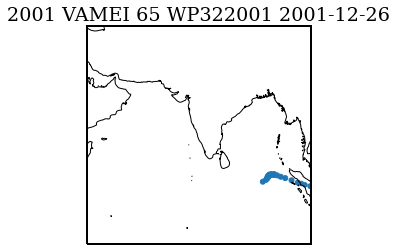

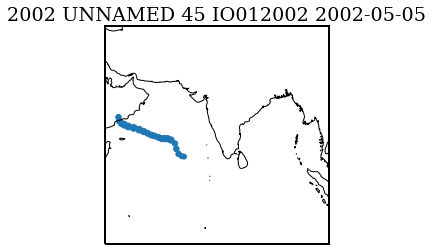

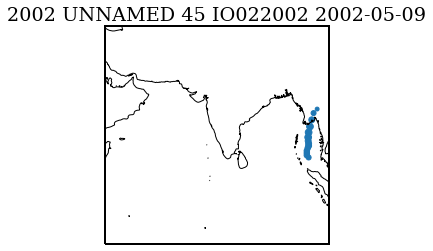

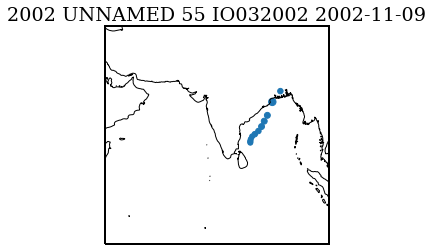

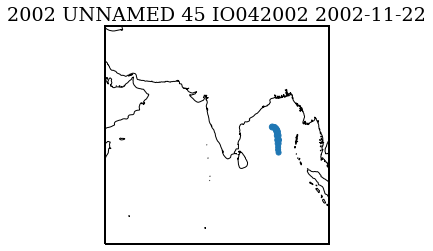

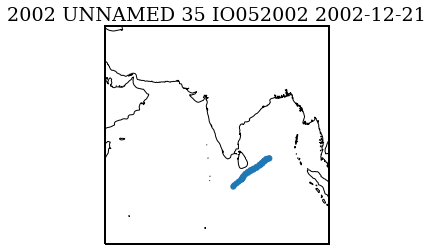

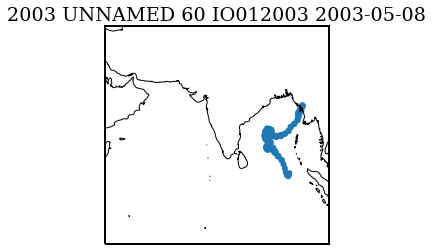

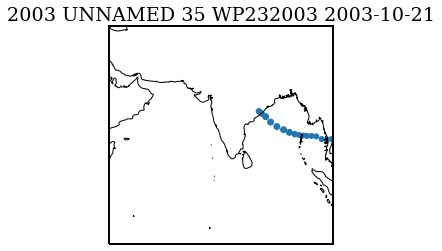

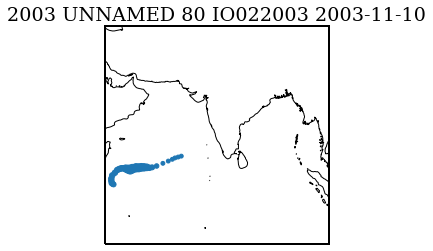

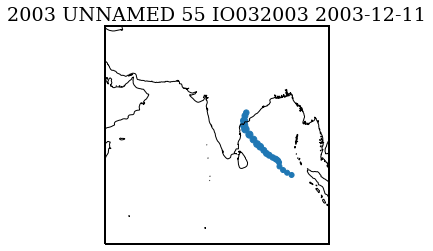

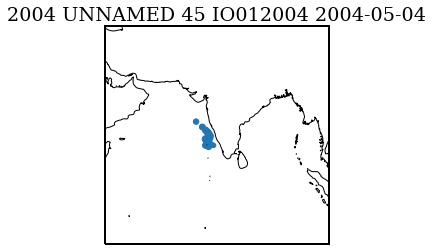

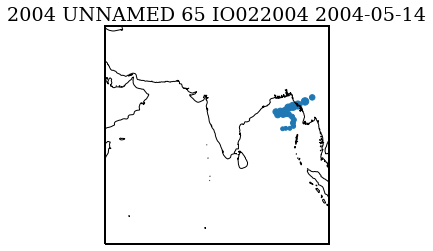

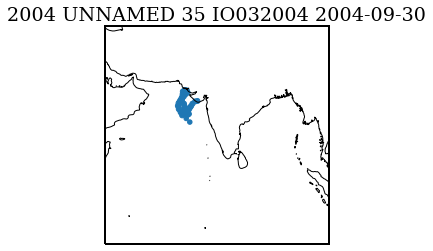

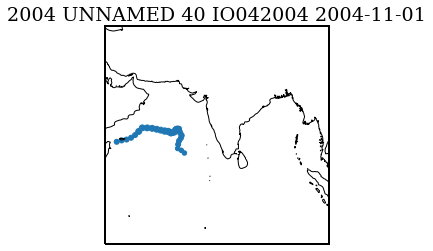

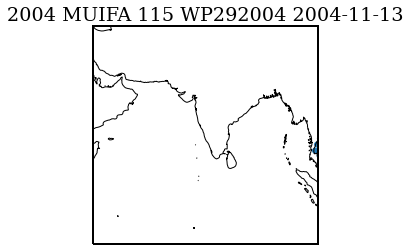

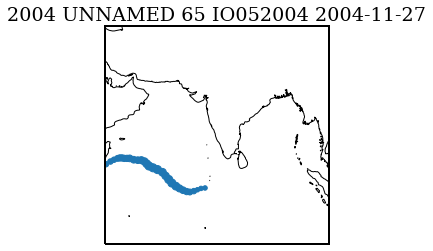

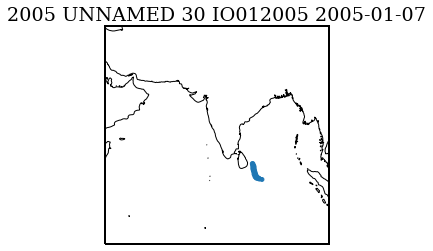

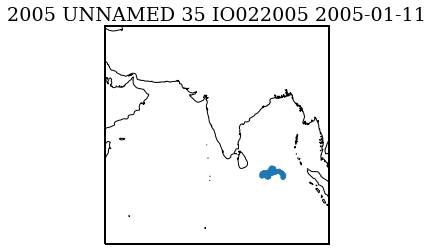

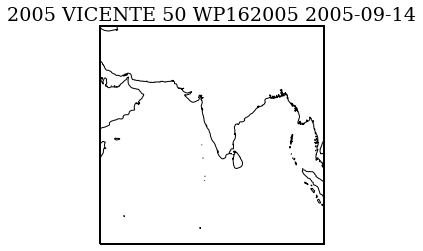

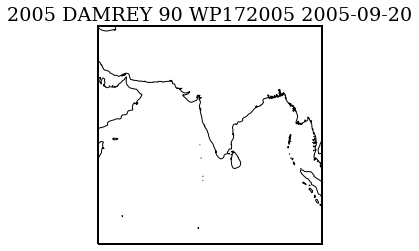

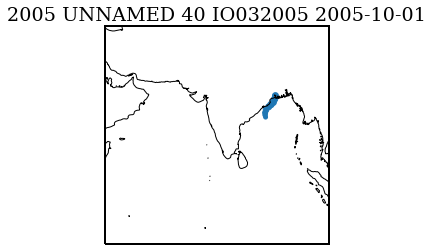

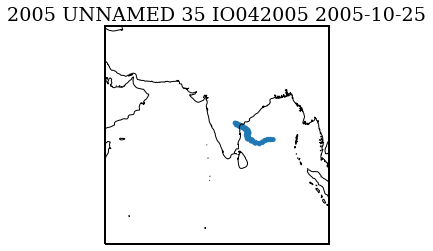

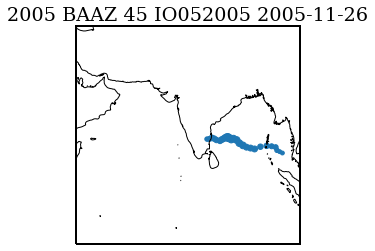

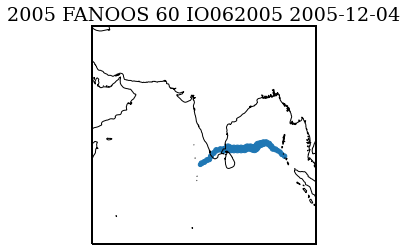

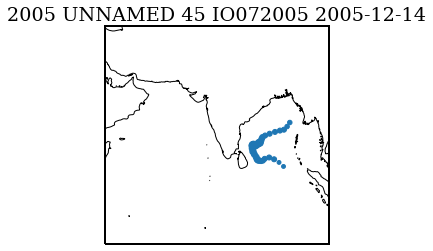

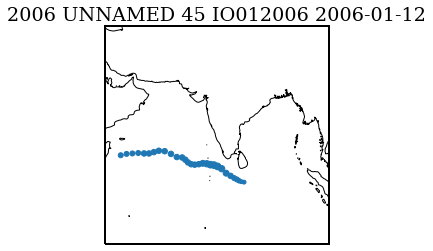

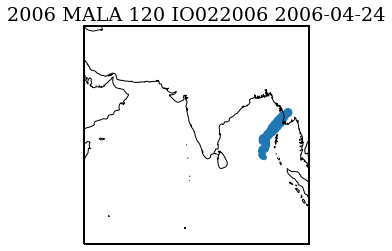

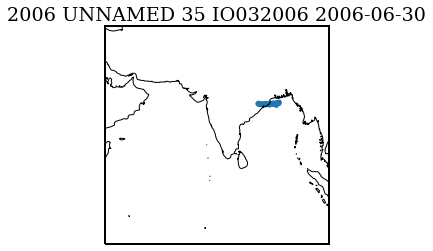

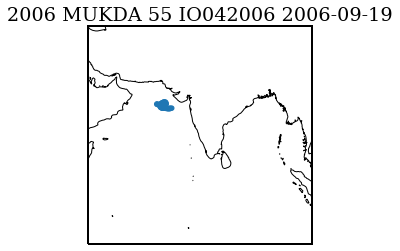

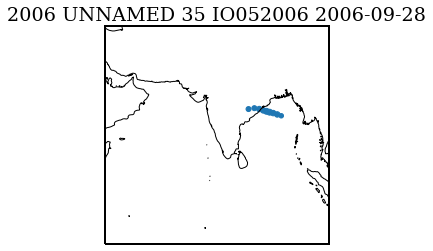

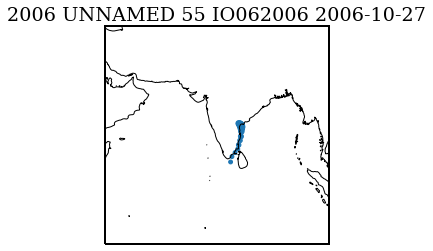

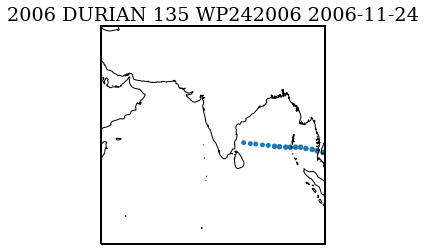

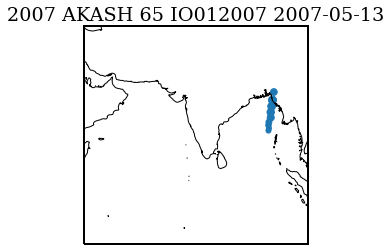

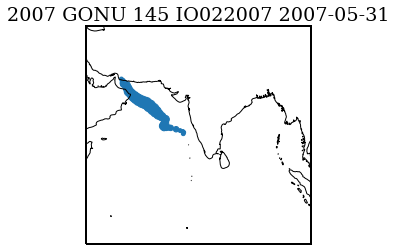

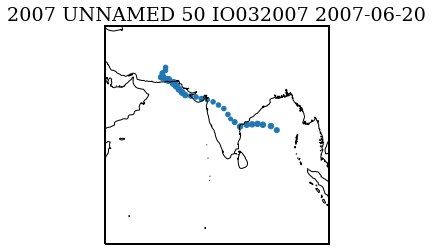

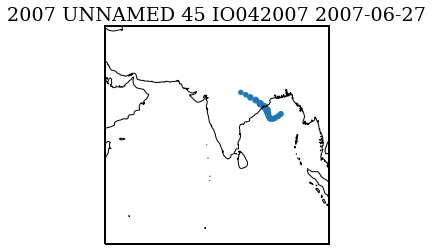

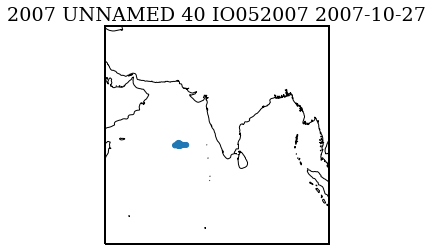

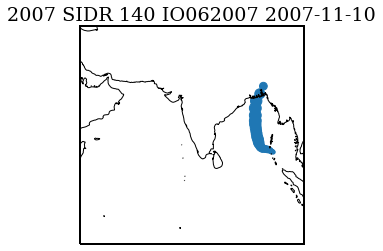

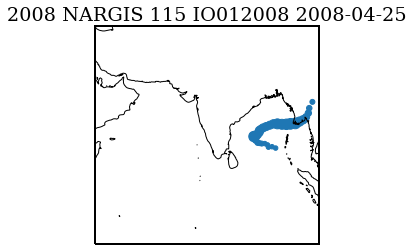

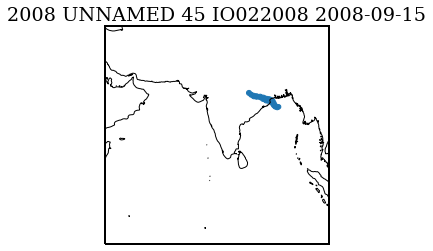

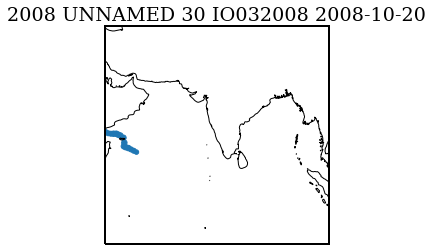

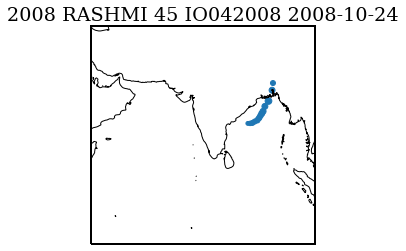

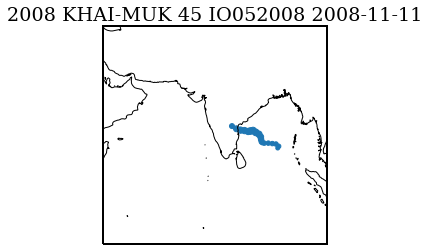

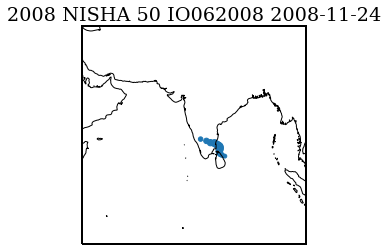

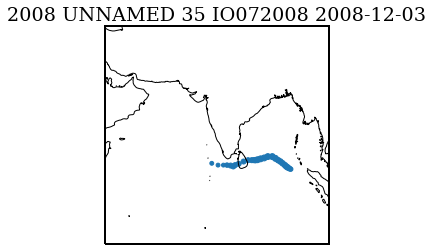

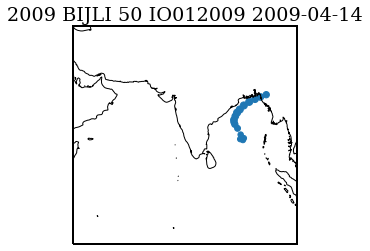

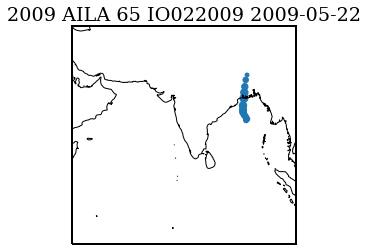

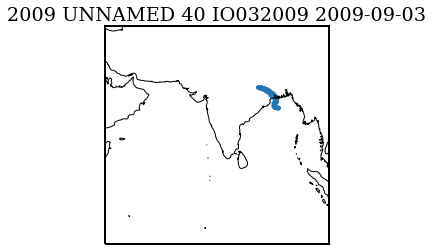

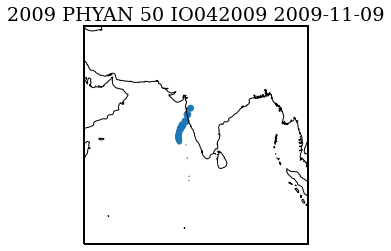

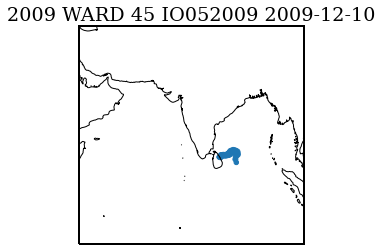

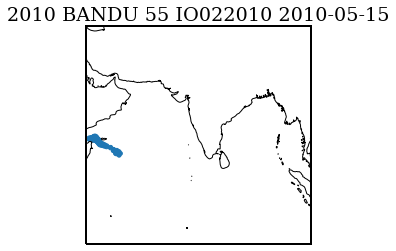

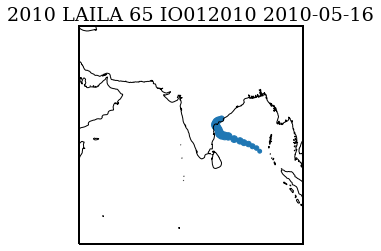

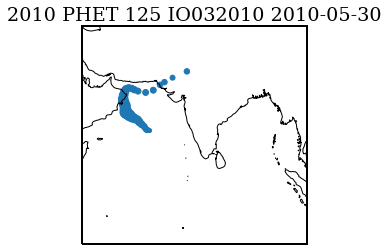

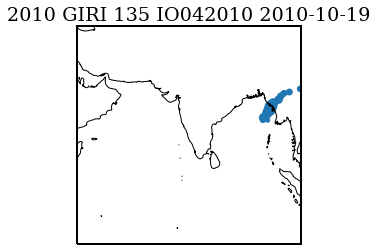

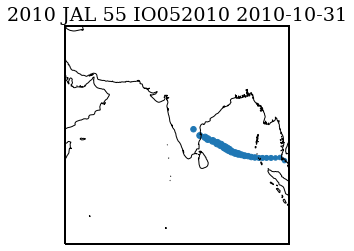

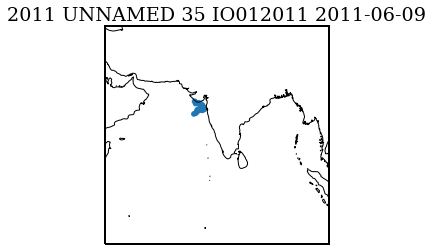

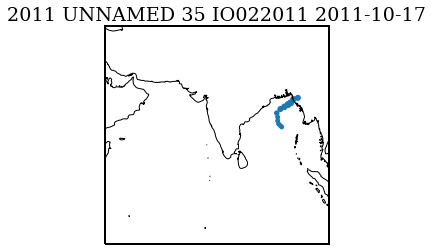

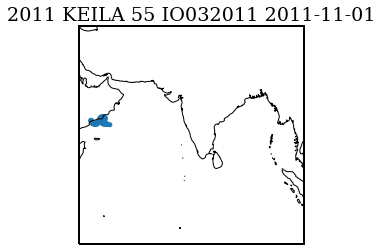

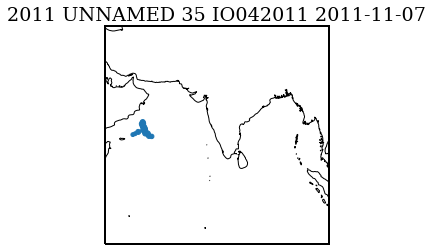

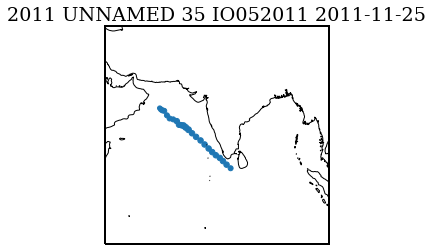

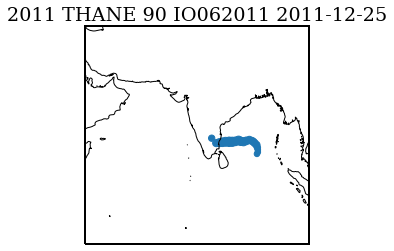

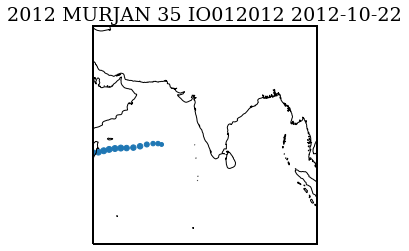

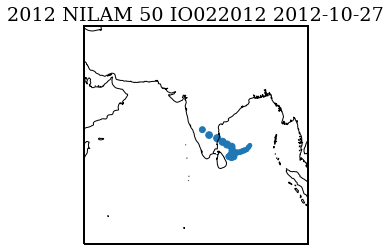

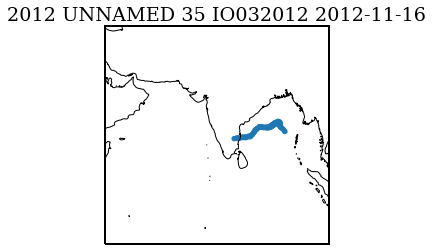

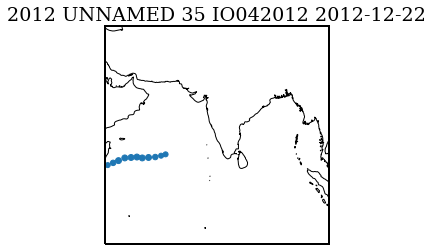

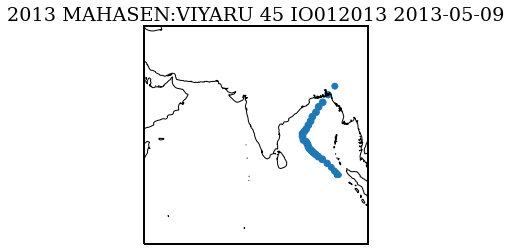

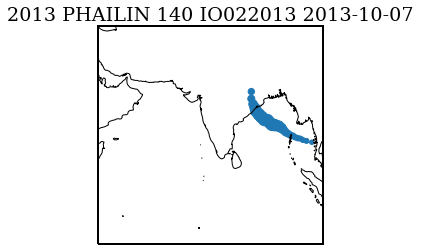

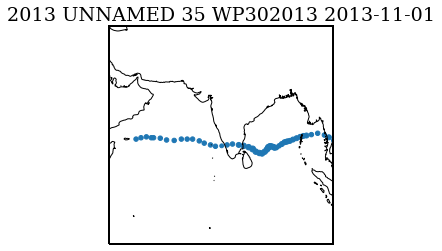

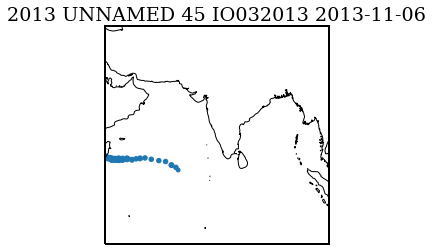

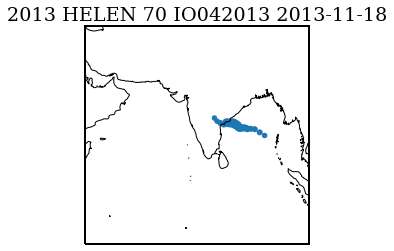

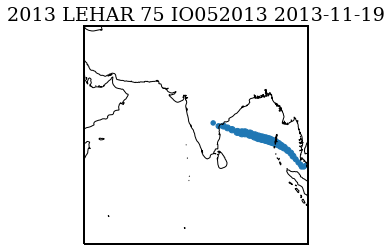

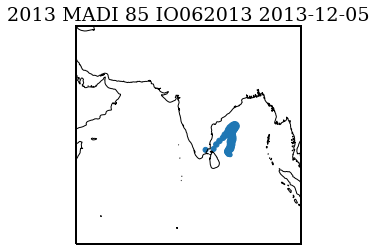

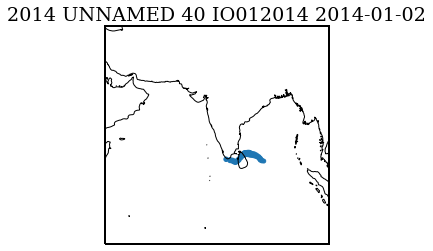

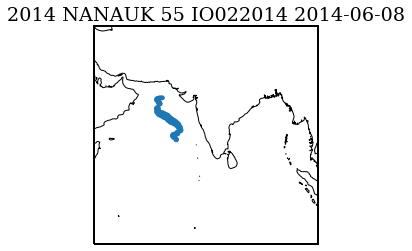

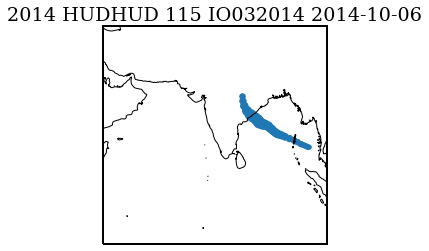

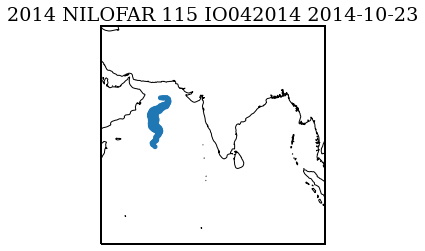

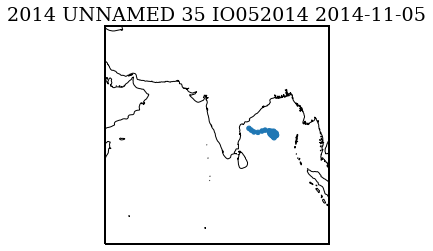

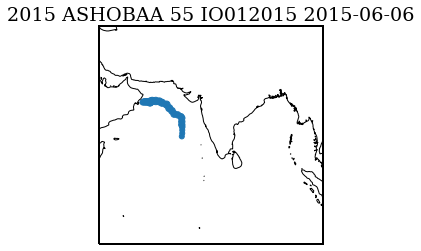

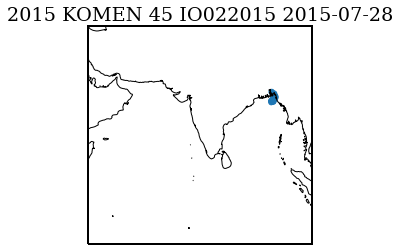

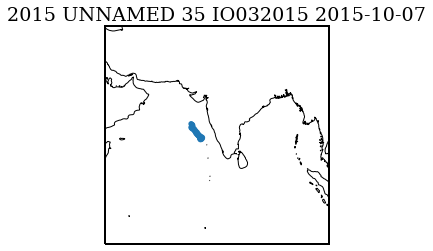

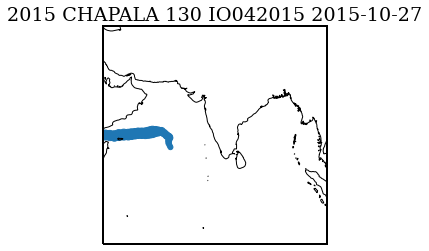

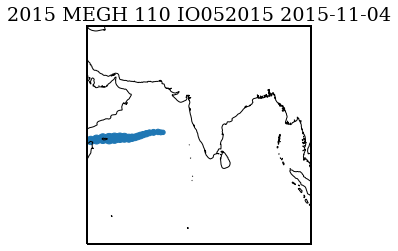

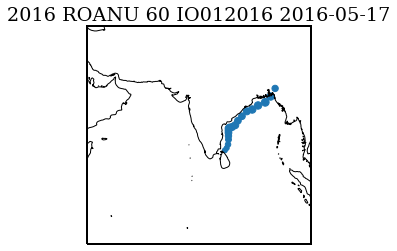

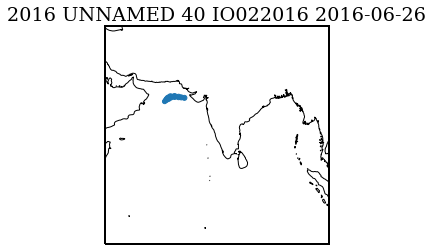

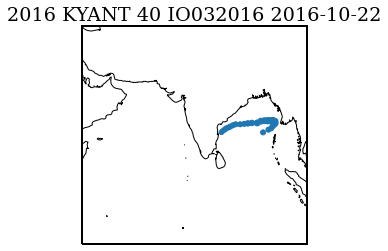

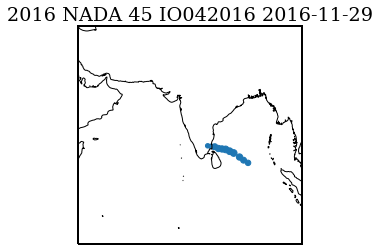

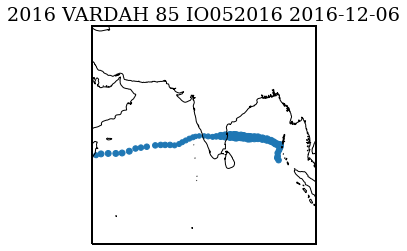

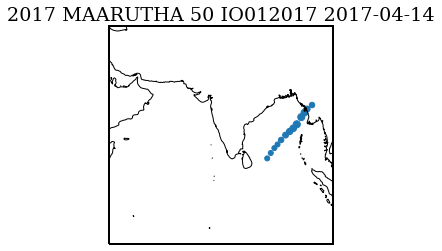

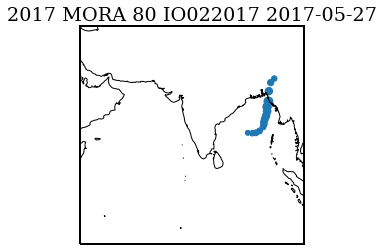

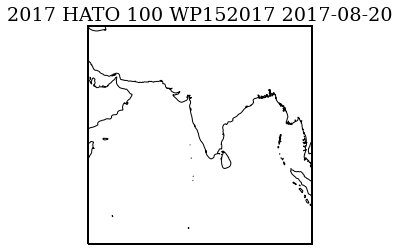

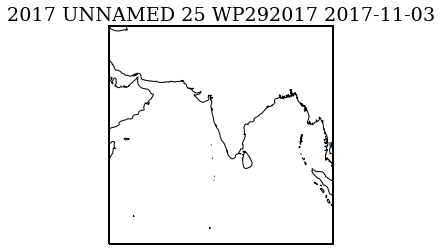

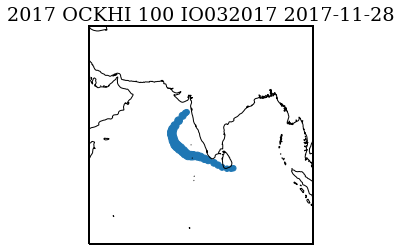

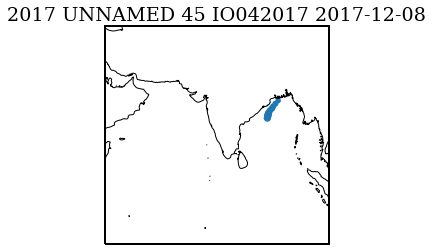

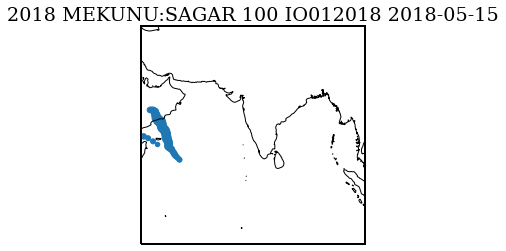

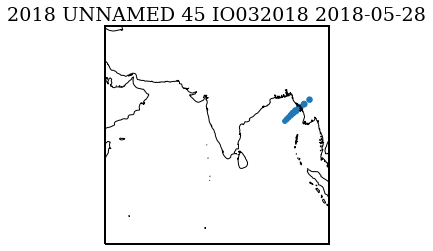

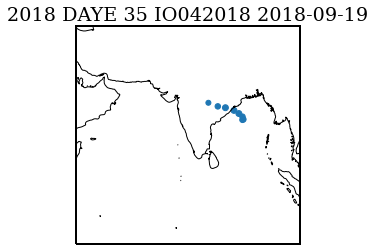

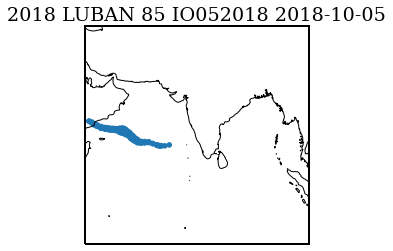

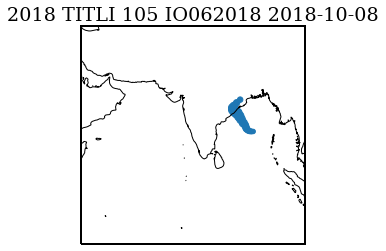

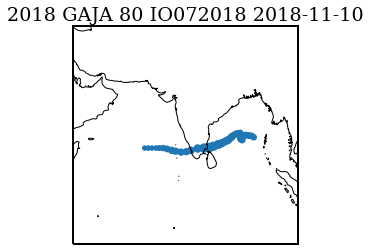

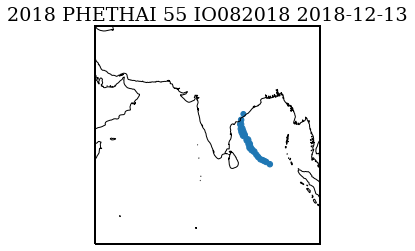

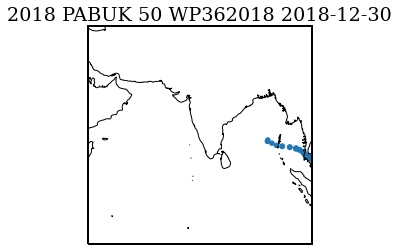

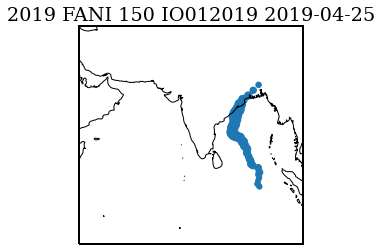

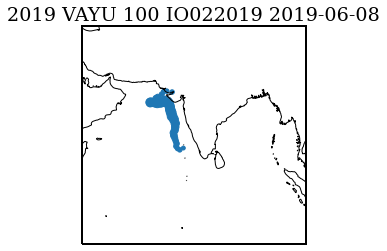

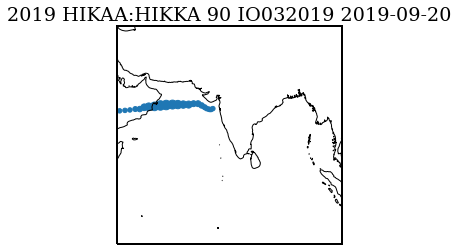

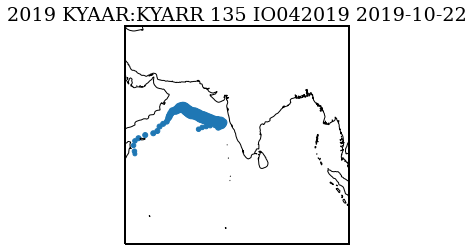

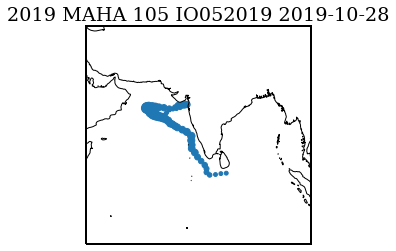

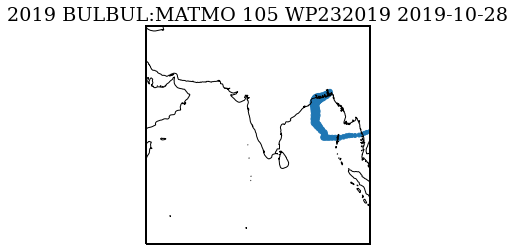

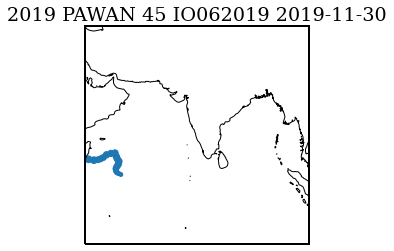

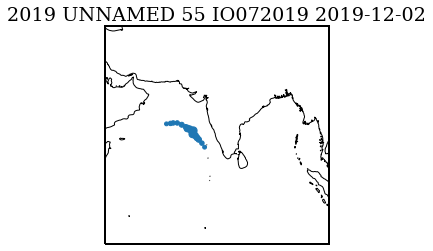

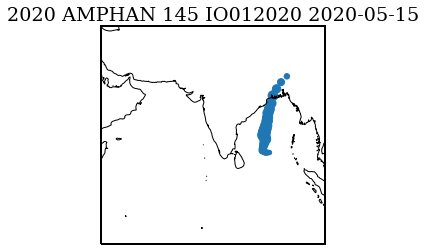

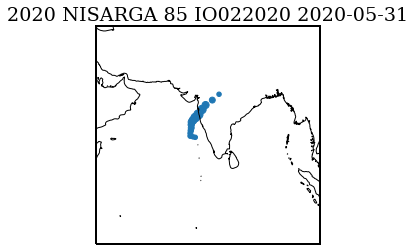

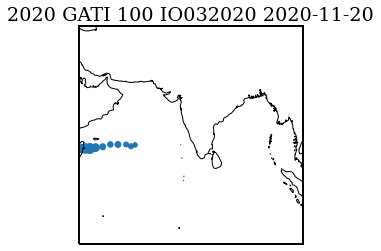

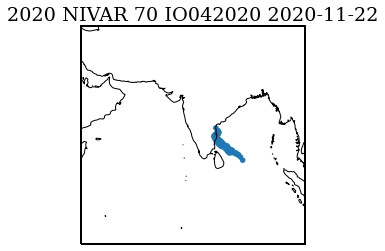

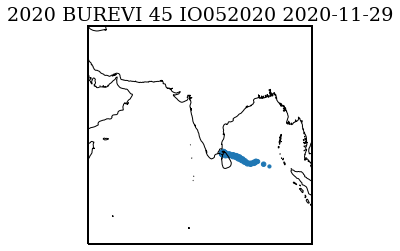

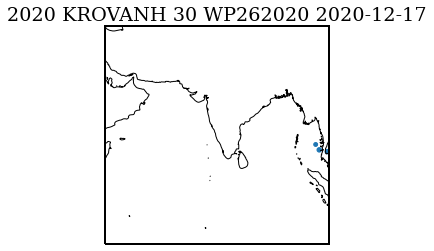

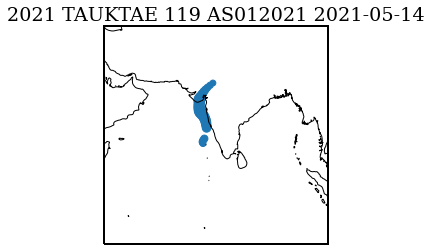

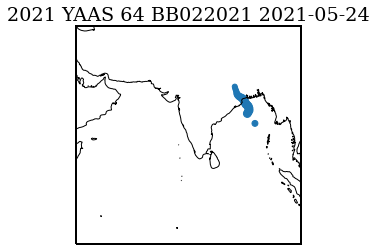

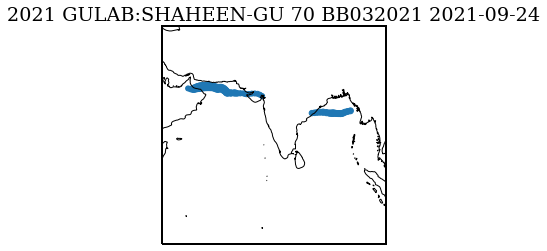

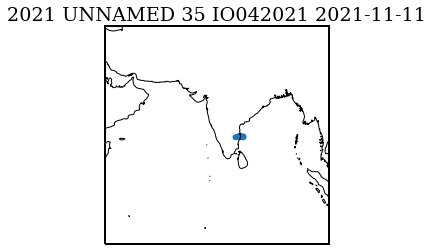

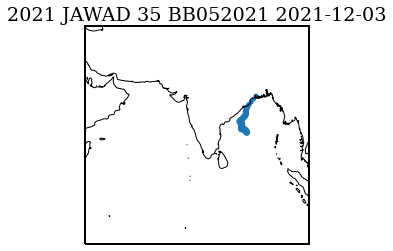

In [101]:
for i in range(600,len(hurdat_atl.data.keys())):
    ax = plt.subplot(projection=ccrs.PlateCarree())
    ax.set_extent([50,100,-10,35])
    plt.scatter(hurdat_atl.data[list(hurdat_atl.data.keys())[i]]['lon'],
                hurdat_atl.data[list(hurdat_atl.data.keys())[i]]['lat'],
                hurdat_atl.data[list(hurdat_atl.data.keys())[i]]['vmax'])
    plt.title(str(hurdat_atl.data[list(hurdat_atl.data.keys())[i]]['year'])+' '+
              hurdat_atl.data[list(hurdat_atl.data.keys())[i]]['name']+' '+
             str(max(hurdat_atl.data[list(hurdat_atl.data.keys())[i]]['vmax']))+' '+
             hurdat_atl.data[list(hurdat_atl.data.keys())[i]]['id']+' '+
             str(hurdat_atl.data[list(hurdat_atl.data.keys())[i]]['date'][0].date()))
    ax.coastlines()
    plt.show()

IO021975
IO021976
IO021977
IO021979
IO011984
IO021985
IO031987
IO011988
IO021989
IO021992
IO031994
IO021996
IO041996
IO021998
IO031998
IO021999
IO012001
IO012002
IO012004 
IO022007
IO022010
IO032010
IO012011
IO022014
IO012015
IO012018
IO022019
IO022020
AS012021

In [7]:
Tauktae_2021 = hurdat_atl.get_storm('AS012021')
Nisarga_2020 = hurdat_atl.get_storm('IO022020')
Vayu_2019 = hurdat_atl.get_storm('IO022019')
MEKUNU_SAGAR_2018 = hurdat_atl.get_storm('IO012018')
ASHOBAA_2015 = hurdat_atl.get_storm('IO012015')
NANAUK_2014 = hurdat_atl.get_storm('IO022014')
PHET_2010 = hurdat_atl.get_storm('IO032010')
GONU_2007 = hurdat_atl.get_storm('IO022007')
AS_2001 = hurdat_atl.get_storm('IO012001')
AS_1999 = hurdat_atl.get_storm('IO021999')
AS_1998 = hurdat_atl.get_storm('IO031998')

#––––––––––––––––––––––––––––––
tauk21 = Tauktae_2021.to_xarray()
nisa20 = Nisarga_2020.to_xarray()
vayu19 = Vayu_2019.to_xarray()
meku18 = MEKUNU_SAGAR_2018.to_xarray()
asho15 = ASHOBAA_2015.to_xarray()
nana14 = NANAUK_2014.to_xarray()
phet10 = PHET_2010.to_xarray()
gonu07 = GONU_2007.to_xarray()
as_01 = AS_2001.to_xarray()
as_99 = AS_1999.to_xarray()
as_98 = AS_1998.to_xarray()

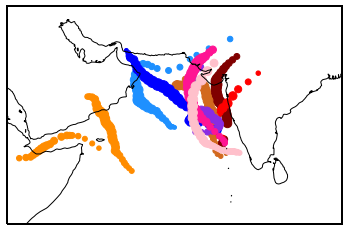

In [8]:
ax = plt.subplot(projection=ccrs.PlateCarree())
ax.set_extent([40,90,0,30])
ax.coastlines()
plt.scatter(tauk21.lon,tauk21.lat,tauk21.vmax,c='maroon')
plt.scatter(nisa20.lon,nisa20.lat,nisa20.vmax,c='red')
plt.scatter(vayu19.lon,vayu19.lat,vayu19.vmax,c='chocolate')
plt.scatter(meku18.lon,meku18.lat,meku18.vmax,c='darkorange')
# plt.scatter(asho15.lon,asho15.lat,asho15.vmax,c='yellow')
# plt.scatter(nana14.lon,nana14.lat,nana14.vmax,c='forestgreen')
plt.scatter(phet10.lon,phet10.lat,phet10.vmax,c='dodgerblue')
plt.scatter(gonu07.lon,gonu07.lat,gonu07.vmax,c='blue')
plt.scatter(as_01.lon,as_01.lat,as_01.vmax,c='blueviolet')
plt.scatter(as_99.lon,as_99.lat,as_99.vmax,c='deeppink')
plt.scatter(as_98.lon,as_98.lat,as_98.vmax,c='pink')

In [8]:
escs = list([tauk21, vayu19, meku18, as_01, as_99, as_98])

In [9]:
for v in escs:
    print(v.attrs['name'],v['vmax'].max().values,str(v.time[0].values).split('T')[0])

TAUKTAE 119.0 2021-05-14
VAYU 100 2019-06-08
MEKUNU:SAGAR 100 2018-05-15
UNNAMED 110 2001-05-21
UNNAMED 110 1999-05-15
UNNAMED 105 1998-06-01


## MJO BOM data

In [9]:
fmjo = pd.read_excel('mjo.xlsx')
fmjo.set_index(pd.to_datetime(fmjo['year'].astype(str)+fmjo['month'].astype(str)+fmjo['day'].astype(str),
                             format="%Y%m%d"),inplace=True)
fmjo.drop(['month','day','year','Missing Value = 1E+36 or 999'],axis=1,inplace = True)

In [10]:
xj = fmjo.to_xarray()

In [11]:
xj = xj.sortby('index')

In [12]:
m214 = xj.sel(index = slice('2021-04-01','2021-04-30'))
m215 = xj.sel(index = slice('2021-05-01','2021-05-31'))
m216 = xj.sel(index = slice('2021-06-01','2021-06-30'))

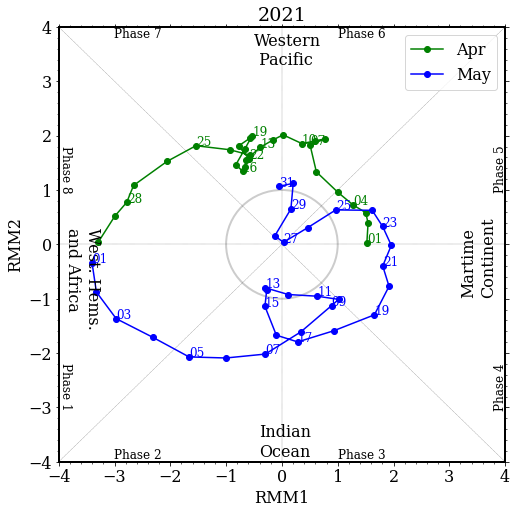

In [13]:
def rmm_background(ax,opt=0):
    fsize=12
    ax.plot([-4,4],[-4,4],linewidth=0.2,linestyle='--',color='k')
    ax.plot([-4,4],[4,-4],linewidth=0.2,linestyle='--',color='k')
    ax.plot([-4,4],[0,0],linewidth=0.2,linestyle='--',color='k')
    ax.plot([0,0],[-4,4],linewidth=0.2,linestyle='--',color='k')
#     if opt:
#         axislim = 4
#     else:
#         axislim = 2
    axislim = 4
    ax.set_xlim([-axislim,axislim])
    ax.set_ylim([-axislim,axislim])
    
    # circle in the center of the plot to denote weak index  
    circle = plt.Circle((0, 0), radius=1, fc='w', ec='k',linewidth=2, alpha=0.2,fill=False,)
    ax.add_patch(circle)
    # plt.Circle((0, 0), 1, color='r',fill=False)
    ax.text(-axislim, -3/4*axislim,  r'Phase 1', fontsize=fsize,rotation=-90)
    ax.text(-3/4*axislim, -axislim+0.05,  r'Phase 2', fontsize=fsize)
    ax.text(1/4*axislim, -axislim+0.05,   r'Phase 3', fontsize=fsize) 
    ax.text(axislim-0.2, -3/4*axislim, r'Phase 4', fontsize=fsize,rotation=90)
    ax.text(axislim-0.2, 1/4*axislim,   r'Phase 5', fontsize=fsize,rotation=90)
    ax.text(1/4*axislim, axislim-0.2,  r'Phase 6', fontsize=fsize)
    ax.text(-3/4*axislim, axislim-0.2, r'Phase 7', fontsize=fsize)
    ax.text(-axislim, 1/4*axislim,   r'Phase 8', fontsize=fsize,rotation=-90)
    ax.set_xlabel('RMM1')
    ax.set_ylabel('RMM2')
    ax.minorticks_on()
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.text(-0.4,-3.9, 'Indian\nOcean')
    ax.text(-0.5,3.3, 'Western\n Pacific')
    ax.text(3.2,-0.9, 'Martime\nContinent',rotation=90)
    ax.text(-3.9,-1.5, 'West. Hems.\nand Africa',rotation=270)
    return ax
fig = plt.figure(figsize=[8,8])
ax=plt.axes()
rmm_background(ax)
plt.plot(m214['RMM1'],m214['RMM2'],'g-o',label='Apr')
plt.plot(m215['RMM1'],m215['RMM2'],'b-o',label='May')
# plt.plot(m216['RMM1'],m216['RMM2'],'r-o',label='Jun')
for i in range(0,len(m214['RMM1']),3):
    plt.annotate(str(m214.index[i].values).split(sep='T')[0].split(sep='-')[-1],
                 xy=[m214['RMM1'][i],m214['RMM2'][i]], c='g',size=12)
    
for i in range(0,len(m215['RMM1']),2):
    plt.annotate(str(m215.index[i].values).split(sep='T')[0].split(sep='-')[-1],
                 xy=[m215['RMM1'][i],m215['RMM2'][i]], c='b',size=12)

# for i in range(0,len(m216['RMM1']),3):
#     plt.annotate(str(m216.index[i].values).split(sep='T')[0].split(sep='-')[-1],
#                  xy=[m216['RMM1'][i],m216['RMM2'][i]],c='r',size=12)
plt.legend()
plt.title('2021')
# plt.savefig('mjo_rmm_phase_2021.png',dpi=300,bbox_inches='tight')
plt.show()

## SST

In [10]:
sstd = xr.open_mfdataset('../OISSTv2/sst*nc')

In [11]:
sst21 = sstd.sel(time=slice('2021-05-07','2021-05-13'))['sst']
# sst20 = sstd.sel(time=slice('2020-05-25','2020-05-31'))['sst']
sst19 = sstd.sel(time=slice('2019-06-02','2019-06-09'))['sst']
sst18 = sstd.sel(time=slice('2018-05-09','2018-05-15'))['sst']
# sst10 = sstd.sel(time=slice('2010-05-24','2010-05-30'))['sst']
# sst07 = sstd.sel(time=slice('2007-05-25','2007-05-31'))['sst']
sst01 = sstd.sel(time=slice('2001-05-14','2001-05-20'))['sst']
sst99 = sstd.sel(time=slice('1999-05-08','1999-05-14'))['sst']
sst98 = sstd.sel(time=slice('1998-05-26','1998-06-01'))['sst']

In [12]:
def cytitle(cyclone,i,**kwargs):
    a = pd.to_datetime(cyclone['time'][int(np.where(cyclone.vmax>=35)[0][0])].values).strftime('%d %b %Y')
    plt.title(i+'  '+a,**kwargs)

In [13]:
def decorat(ax,t=False,b=False,l=False,r=False):
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, 
                         linestyle='--', draw_labels=True)
    gl.xlabels_top = t
    gl.ylabels_left = l
    gl.ylabels_right=r
    gl.xlabels_bottom = b
    gl.xlines = False
    gl.ylines = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'weight': 'light','family':'serif'}
    gl.ylabel_style = {'weight': 'light','family':'serif'}
    

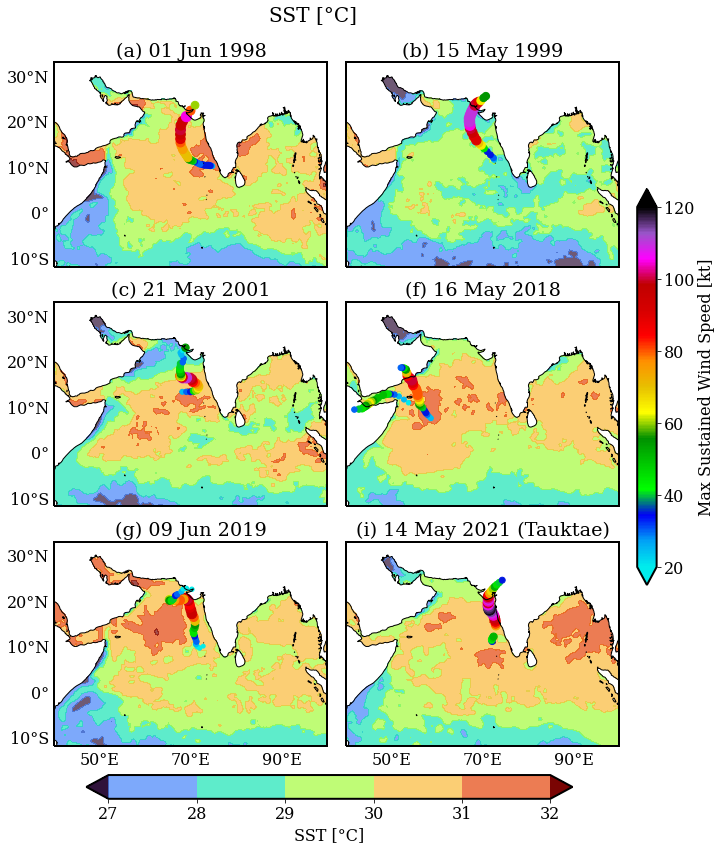

In [20]:
fig = plt.figure(figsize=[9,11])
#1
ax = plt.subplot(321,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-10,30])
sst98.mean(dim='time').plot.contourf(cmap='turbo',levels=np.linspace(27,32,6),extend='both',
                                     add_colorbar=False,alpha=0.7)
plt.scatter(as_98.lon,as_98.lat,as_98.vmax,c=as_98.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(as_98,'(a)')
ax.set_title('(a) 01 Jun 1998')
decorat(ax,l=True,)

#2
ax = plt.subplot(322,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-10,30])
sst99.mean(dim='time').plot.contourf(cmap='turbo',levels=np.linspace(27,32,6),extend='both',
                                     add_colorbar=False,alpha=0.7)
plt.scatter(as_99.lon,as_99.lat,as_99.vmax,c=as_99.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(as_99,'(b)')
ax.set_title('(b) 15 May 1999')

#3
ax = plt.subplot(323,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-10,30])
sst01.mean(dim='time').plot.contourf(cmap='turbo',levels=np.linspace(27,32,6),extend='both',
                                     add_colorbar=False,alpha=0.7)
plt.scatter(as_01.lon,as_01.lat,as_01.vmax,c=as_01.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(as_01,'(c)')
ax.set_title('(c) 21 May 2001')
decorat(ax,l=True,)

#4
# ax = plt.subplot(334,projection=ccrs.PlateCarree())
# ax.coastlines(); ax.set_extent([40,100,-10,30])
# sst07.mean(dim='time').plot.contourf(cmap='turbo',levels=np.linspace(27,32,6),extend='both',
#                                      add_colorbar=False,alpha=0.7)
# plt.scatter(gonu07.lon,gonu07.lat,gonu07.vmax,c=gonu07.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# # cytitle(gonu07,'(d)')
# ax.set_title('(d) 01 Jun 2007')

# decorat(ax,l=True,)

# #5
# ax = plt.subplot(335,projection=ccrs.PlateCarree())
# ax.coastlines(); ax.set_extent([40,100,-10,30])
# sst10.mean(dim='time').plot.contourf(cmap='turbo',levels=np.linspace(27,32,6),extend='both',
#                                      add_colorbar=False,alpha=0.7)
# plt.scatter(phet10.lon,phet10.lat,phet10.vmax,c=phet10.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# # cytitle(phet10,'(e)')
# ax.set_title('(e) 31 May 2010')
# #6
ax = plt.subplot(324,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-10,30])
sst18.mean(dim='time').plot.contourf(cmap='turbo',levels=np.linspace(27,32,6),extend='both',
                                     add_colorbar=False,alpha=0.7)
plt.scatter(meku18.lon,meku18.lat,meku18.vmax,c=meku18.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(meku18,'(f)')
ax.set_title('(f) 16 May 2018')

#7
ax = plt.subplot(325,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-10,30])
sst19.mean(dim='time').plot.contourf(cmap='turbo',levels=np.linspace(27,32,6),extend='both',
                                     add_colorbar=False,alpha=0.7)
ax.scatter(vayu19.lon,vayu19.lat,vayu19.vmax,c=vayu19.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(vayu19,'(g)')
ax.set_title('(g) 09 Jun 2019')

decorat(ax,l=True,b=True)


#8
# ax = plt.subplot(338,projection=ccrs.PlateCarree())
# ax.coastlines(); ax.set_extent([40,100,-10,30])
# sst20.mean(dim='time').plot.contourf(cmap='turbo',levels=np.linspace(27,32,6),extend='both',
#                                      add_colorbar=False,alpha=0.7)
# ax.scatter(nisa20.lon,nisa20.lat,nisa20.vmax,c=nisa20.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# # cytitle(nisa20,'(h)')
# ax.set_title('(h) 01 Jun 2020')

# decorat(ax,b=True,)
#9
ax = plt.subplot(326,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-10,30])
pl = sst21.mean(dim='time').plot.contourf(cmap='turbo',levels=np.linspace(27,32,6),
                                          extend='both',add_colorbar=False,alpha=0.7)
pl2 = ax.scatter(tauk21.lon,tauk21.lat,tauk21.vmax,c=tauk21.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(tauk21,'(i)  Tauktae')
ax.set_title('(i) 14 May 2021 (Tauktae)')

decorat(ax,b=True,)

#------------

cbar_ax = fig.add_axes([0.15, -0.02, 0.75, 0.03],)#lbwh
cbar1 = fig.colorbar(pl, cax=cbar_ax,orientation='horizontal')
cbar1.set_label('SST [°C]')

cba_ax = fig.add_axes([1.0, 0.25, 0.03, 0.5])#lbwh
cbar = fig.colorbar(pl2, cax=cba_ax,extend='both')
cbar.set_label('Max Sustained Wind Speed [kt]')
plt.suptitle('SST [°C]',weight = 'normal',family='serif',size=20)
plt.tight_layout()
plt.savefig('SST_ESCS_com.png',dpi=300,bbox_inches='tight')

In [64]:
# %store hurdat_atl
# %store -r hurdat_atl

## SST Anomaly

In [ ]:
anom21 = sstd.sel(time=slice('2021-05-07','2021-05-13'))['anom']
anom20 = sstd.sel(time=slice('2020-05-25','2020-05-31'))['anom']
anom19 = sstd.sel(time=slice('2019-06-02','2019-06-09'))['anom']
anom18 = sstd.sel(time=slice('2018-05-09','2018-05-15'))['anom']
anom10 = sstd.sel(time=slice('2010-05-24','2010-05-30'))['anom']
anom07 = sstd.sel(time=slice('2007-05-25','2007-05-31'))['anom']
anom01 = sstd.sel(time=slice('2001-05-14','2001-05-20'))['anom']
anom99 = sstd.sel(time=slice('1999-05-08','1999-05-14'))['anom']
anom98 = sstd.sel(time=slice('1998-05-26','1998-06-01'))['anom']

In [ ]:
panom21 = sstd.sel(time=slice('2021-05-20','2021-05-26'))['anom']
panom20 = sstd.sel(time=slice('2020-06-05','2020-06-11'))['anom']
panom19 = sstd.sel(time=slice('2019-06-18','2019-06-24'))['anom']
panom18 = sstd.sel(time=slice('2018-05-28','2018-06-03'))['anom']
panom10 = sstd.sel(time=slice('2010-06-08','2010-06-14'))['anom']
panom07 = sstd.sel(time=slice('2007-06-08','2007-06-14'))['anom']
panom01 = sstd.sel(time=slice('2001-05-30','2001-06-05'))['anom']
panom99 = sstd.sel(time=slice('1999-05-22','1999-05-28'))['anom']
panom98 = sstd.sel(time=slice('1998-06-10','1998-06-16'))['anom']

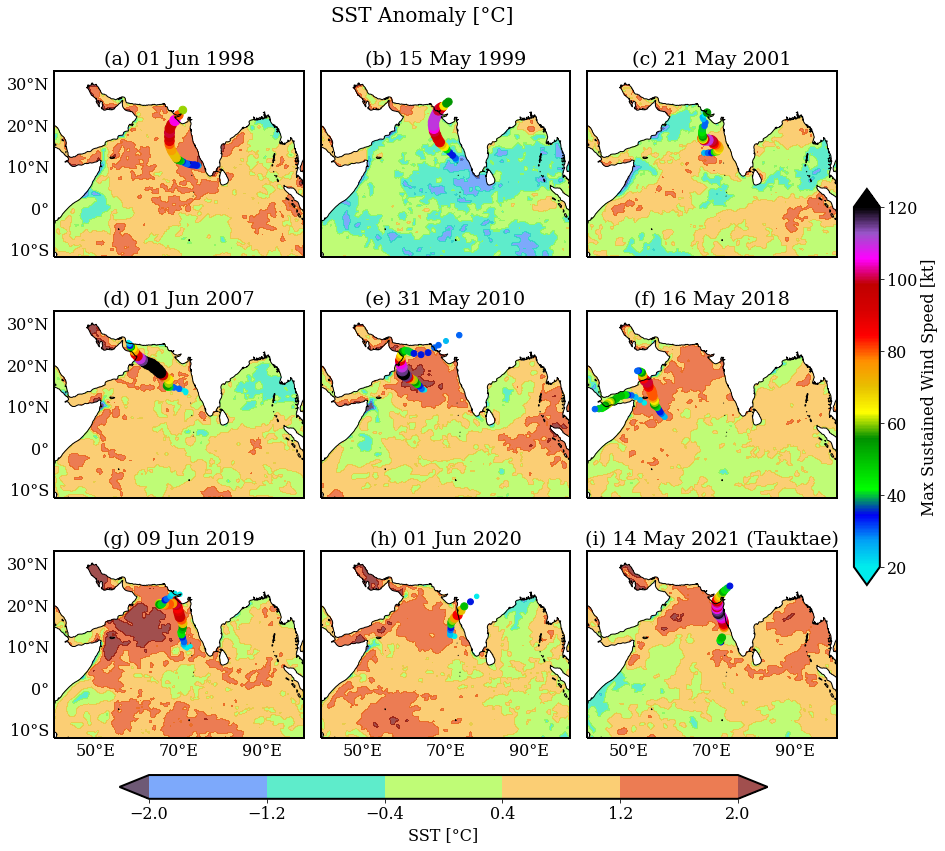

In [78]:
fig = plt.figure(figsize=[12,11])
#1
ax = plt.subplot(331,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-10,30])
anom98.mean('time').plot.contourf(cmap='turbo',extend='both',
                                     add_colorbar=False,levels=np.linspace(-2,2,6),alpha=0.7)
plt.scatter(as_98.lon,as_98.lat,as_98.vmax,c=as_98.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(as_98,'(a)')
ax.set_title('(a) 01 Jun 1998')
decorat(ax,l=True)

#2
ax = plt.subplot(332,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-10,30])
anom99.mean('time').plot.contourf(cmap='turbo',extend='both',
                                     add_colorbar=False,levels=np.linspace(-2,2,6),alpha=0.7)
plt.scatter(as_99.lon,as_99.lat,as_99.vmax,c=as_99.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(as_99,'(b)')
ax.set_title('(b) 15 May 1999')
#3
ax = plt.subplot(333,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-10,30])
anom01.mean('time').plot.contourf(cmap='turbo',extend='both',
                                     add_colorbar=False,levels=np.linspace(-2,2,6),alpha=0.7)
plt.scatter(as_01.lon,as_01.lat,as_01.vmax,c=as_01.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(as_01,'(c)')
ax.set_title('(c) 21 May 2001')

#4
ax = plt.subplot(334,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-10,30])
anom07.mean('time').plot.contourf(cmap='turbo',extend='both',
                                     add_colorbar=False,levels=np.linspace(-2,2,6),alpha=0.7)
plt.scatter(gonu07.lon,gonu07.lat,gonu07.vmax,c=gonu07.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(gonu07,'(d)')
decorat(ax,l=True)
ax.set_title('(d) 01 Jun 2007')

#5
ax = plt.subplot(335,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-10,30])
anom10.mean('time').plot.contourf(cmap='turbo',extend='both',
                                     add_colorbar=False,levels=np.linspace(-2,2,6),alpha=0.7)
plt.scatter(phet10.lon,phet10.lat,phet10.vmax,c=phet10.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(phet10,'(e)')
ax.set_title('(e) 31 May 2010')

#6
ax = plt.subplot(336,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-10,30])
anom18.mean('time').plot.contourf(cmap='turbo',extend='both',
                                     add_colorbar=False,levels=np.linspace(-2,2,6),alpha=0.7)
plt.scatter(meku18.lon,meku18.lat,meku18.vmax,c=meku18.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(meku18,'(f)')
ax.set_title('(f) 16 May 2018')


#7
ax = plt.subplot(337,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-10,30])
anom19.mean('time').plot.contourf(cmap='turbo',extend='both',
                                     add_colorbar=False,levels=np.linspace(-2,2,6),alpha=0.7)
ax.scatter(vayu19.lon,vayu19.lat,vayu19.vmax,c=vayu19.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(vayu19,'(g)')
ax.set_title('(g) 09 Jun 2019')


decorat(ax,b=True,l=True)


#8
ax = plt.subplot(338,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-10,30])
anom20.mean('time').plot.contourf(cmap='turbo',extend='both',
                                     add_colorbar=False,levels=np.linspace(-2,2,6),alpha=0.7)
ax.scatter(nisa20.lon,nisa20.lat,nisa20.vmax,c=nisa20.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(nisa20,'(h)')
ax.set_title('(h) 01 Jun 2020')

decorat(ax,b=True)

#9
ax = plt.subplot(339,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-10,30])
pl = anom21.mean('time').plot.contourf(cmap='turbo',
                                          extend='both',add_colorbar=False,levels=np.linspace(-2,2,6),alpha=0.7)
pl2 = ax.scatter(tauk21.lon,tauk21.lat,tauk21.vmax,c=tauk21.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(tauk21,'(i)  Tauktae')
ax.set_title('(i) 14 May 2021 (Tauktae)')

decorat(ax,b=True)

#------------

cbar_ax = fig.add_axes([0.15, -0.02, 0.75, 0.03],)#lbwh
cbar1 = fig.colorbar(pl, cax=cbar_ax,orientation='horizontal')
cbar1.set_label('SST [°C]')

cba_ax = fig.add_axes([1.0, 0.25, 0.03, 0.5])#lbwh
cbar = fig.colorbar(pl2, cax=cba_ax,extend='both')
cbar.set_label('Max Sustained Wind Speed [kt]')
plt.suptitle('SST Anomaly [°C]',weight = 'normal',family='serif',size=20)
plt.tight_layout()
# plt.savefig('../../SST_anom_pre.jpg',dpi=300,bbox_inches='tight')
plt.savefig('SST_anom_pre_comp.png',dpi=300,bbox_inches='tight')

## Sea Level Anomaly

In [15]:
sla = xr.open_dataset('ssh_anom/sla1993-2021.nc')

In [19]:
print('Lat: ',sla.latitude[1].values-sla.latitude[0].values, 
      "Lon: ",sla.longitude[1].values-sla.longitude[0].values,
     "Temporal: ",((sla.time[1]-sla.time[0])*(10**-9)/3600/24))

Lat:  0.25 Lon:  0.25 Temporal:  <xarray.DataArray 'time' ()>
array(1, dtype='timedelta64[ns]')


In [ ]:
fig = plt.figure(figsize=[12,11])
#1
ax = plt.subplot(331,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-9,30])
sla['sla'].sel(time=slice('1998-05-26','1998-06-01')).mean('time').plot.contourf(
    cmap='rainbow',extend='both',add_colorbar=False,levels=np.linspace(-0.3,0.3,6), alpha=0.7)
plt.scatter(as_98.lon,as_98.lat,as_98.vmax,c=as_98.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(as_98,'(a)')
ax.set_title('(a) 01 Jun 1998')

decorat(ax,l=True,)
#2
ax = plt.subplot(332,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-9,30])
sla['sla'].sel(time=slice('1999-05-08','1999-05-14')).mean('time').plot.contourf(
    cmap='rainbow',extend='both',add_colorbar=False,levels=np.linspace(-0.3,0.3,6), alpha=0.7)
                                   
plt.scatter(as_99.lon,as_99.lat,as_99.vmax,c=as_99.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(as_99,'(b)')
ax.set_title('(b) 15 May 1999')

#3
ax = plt.subplot(333,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-9,30])
sla['sla'].sel(time=slice('2001-05-14','2001-05-20')).mean('time').plot.contourf(
    cmap='rainbow',extend='both',add_colorbar=False,levels=np.linspace(-0.3,0.3,6), alpha=0.7)
plt.scatter(as_01.lon,as_01.lat,as_01.vmax,c=as_01.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(as_01,'(c)')
ax.set_title('(c) 21 May 2001')

#4
ax = plt.subplot(334,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-9,30])
sla['sla'].sel(time=slice('2007-05-25','2007-05-31')).mean('time').plot.contourf(
    cmap='rainbow',extend='both',add_colorbar=False,levels=np.linspace(-0.3,0.3,6), alpha=0.7)
plt.scatter(gonu07.lon,gonu07.lat,gonu07.vmax,c=gonu07.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(gonu07,'(d)')
ax.set_title('(d) 01 Jun 2007')

decorat(ax,l=True,)

#5
ax = plt.subplot(335,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-9,30])
sla['sla'].sel(time=slice('2010-05-24','2010-05-30')).mean('time').plot.contourf(
    cmap='rainbow',extend='both',add_colorbar=False,levels=np.linspace(-0.3,0.3,6), alpha=0.7)
plt.scatter(phet10.lon,phet10.lat,phet10.vmax,c=phet10.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(phet10,'(e)')
ax.set_title('(e) 31 May 2010')

#6
ax = plt.subplot(336,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-9,30])
sla['sla'].sel(time=slice('2018-05-09','2018-05-15')).mean('time').plot.contourf(
    cmap='rainbow',extend='both',add_colorbar=False,levels=np.linspace(-0.3,0.3,6), alpha=0.7)
plt.scatter(meku18.lon,meku18.lat,meku18.vmax,c=meku18.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(meku18,'(f)')
ax.set_title('(f) 16 May 2018')

#7
ax = plt.subplot(337,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-9,30])
sla['sla'].sel(time=slice('2019-06-02','2019-06-09')).mean('time').plot.contourf(
    cmap='rainbow',extend='both',add_colorbar=False,levels=np.linspace(-0.3,0.3,6), alpha=0.7)
ax.scatter(vayu19.lon,vayu19.lat,vayu19.vmax,c=vayu19.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(vayu19,'(g)')
ax.set_title('(g) 09 Jun 2019')
decorat(ax,l=True,b=True)


#8
ax = plt.subplot(338,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-9,30])
pl =sla['sla'].sel(time=slice('2020-05-25','2020-05-31')).mean('time').plot.contourf(
    cmap='rainbow',extend='both',add_colorbar=False,levels=np.linspace(-0.3,0.3,6), alpha=0.7)
pl2 = ax.scatter(nisa20.lon,nisa20.lat,nisa20.vmax,c=nisa20.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(nisa20,'(h)')
ax.set_title('(h) 01 Jun 2020')

decorat(ax,b=True,)
#9
ax = plt.subplot(339,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-9,30])
pl = sla['sla'].sel(time=slice('2021-05-07','2021-05-13')).mean(dim='time').plot.contourf(
    cmap='rainbow',levels=np.linspace(-0.3,0.3,6),
    extend='both',add_colorbar=False,alpha=0.7)
pl2 = ax.scatter(tauk21.lon,tauk21.lat,tauk21.vmax,c=tauk21.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(tauk21,'(i)  Tauktae')
ax.set_title('(i) 14 May 2021 (Tauktae)')

decorat(ax,b=True,)
#------------

cbar_ax = fig.add_axes([0.15, -0.02, 0.75, 0.03],)#lbwh
cbar1 = fig.colorbar(pl, cax=cbar_ax,orientation='horizontal')
cbar1.set_label('SSH anomaly [m]')

cba_ax = fig.add_axes([1.0, 0.25, 0.03, 0.5])#lbwh
cbar = fig.colorbar(pl2, cax=cba_ax,extend='both')
cbar.set_label('Max Sustained Wind Speed [kt]')
plt.suptitle('SSH anomaly [m]',weight = 'normal',family='serif',size=20)
plt.tight_layout()
# plt.savefig('../../SSH.jpg',dpi=300,bbox_inches='tight')
plt.savefig('SSH_anomaly_pre_comp.png',dpi=300,bbox_inches='tight')

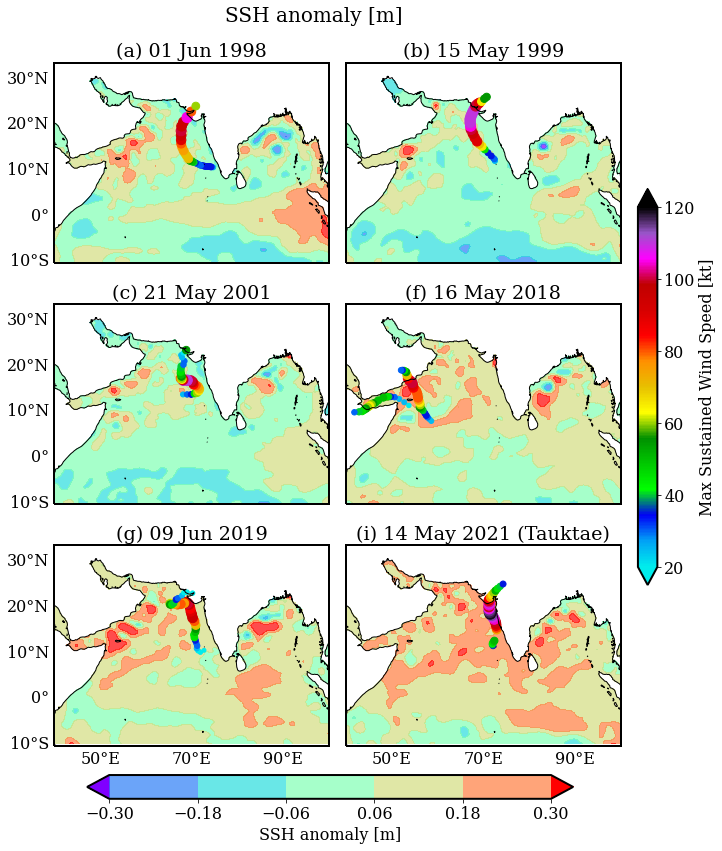

In [21]:
fig = plt.figure(figsize=[9,11])
#1
ax = plt.subplot(321,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-9,30])
sla['sla'].sel(time=slice('1998-05-26','1998-06-01')).mean('time').plot.contourf(
    cmap='rainbow',extend='both',add_colorbar=False,levels=np.linspace(-0.3,0.3,6), alpha=0.7)
plt.scatter(as_98.lon,as_98.lat,as_98.vmax,c=as_98.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(as_98,'(a)')
ax.set_title('(a) 01 Jun 1998')

decorat(ax,l=True,)
#2
ax = plt.subplot(322,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-9,30])
sla['sla'].sel(time=slice('1999-05-08','1999-05-14')).mean('time').plot.contourf(
    cmap='rainbow',extend='both',add_colorbar=False,levels=np.linspace(-0.3,0.3,6), alpha=0.7)
                                   
plt.scatter(as_99.lon,as_99.lat,as_99.vmax,c=as_99.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(as_99,'(b)')
ax.set_title('(b) 15 May 1999')

#3
ax = plt.subplot(323,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-9,30])
sla['sla'].sel(time=slice('2001-05-14','2001-05-20')).mean('time').plot.contourf(
    cmap='rainbow',extend='both',add_colorbar=False,levels=np.linspace(-0.3,0.3,6), alpha=0.7)
plt.scatter(as_01.lon,as_01.lat,as_01.vmax,c=as_01.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(as_01,'(c)')
ax.set_title('(c) 21 May 2001')
decorat(ax,l=True,)

#6
ax = plt.subplot(324,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-9,30])
sla['sla'].sel(time=slice('2018-05-09','2018-05-15')).mean('time').plot.contourf(
    cmap='rainbow',extend='both',add_colorbar=False,levels=np.linspace(-0.3,0.3,6), alpha=0.7)
plt.scatter(meku18.lon,meku18.lat,meku18.vmax,c=meku18.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(meku18,'(f)')
ax.set_title('(f) 16 May 2018')

#7
ax = plt.subplot(325,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-9,30])
sla['sla'].sel(time=slice('2019-06-02','2019-06-09')).mean('time').plot.contourf(
    cmap='rainbow',extend='both',add_colorbar=False,levels=np.linspace(-0.3,0.3,6), alpha=0.7)
ax.scatter(vayu19.lon,vayu19.lat,vayu19.vmax,c=vayu19.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(vayu19,'(g)')
ax.set_title('(g) 09 Jun 2019')
decorat(ax,l=True,b=True)

#9
ax = plt.subplot(326,projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-9,30])
pl = sla['sla'].sel(time=slice('2021-05-07','2021-05-13')).mean(dim='time').plot.contourf(
    cmap='rainbow',levels=np.linspace(-0.3,0.3,6),
    extend='both',add_colorbar=False,alpha=0.7)
pl2 = ax.scatter(tauk21.lon,tauk21.lat,tauk21.vmax,c=tauk21.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
# cytitle(tauk21,'(i)  Tauktae')
ax.set_title('(i) 14 May 2021 (Tauktae)')

decorat(ax,b=True,)
#------------

cbar_ax = fig.add_axes([0.15, -0.02, 0.75, 0.03],)#lbwh
cbar1 = fig.colorbar(pl, cax=cbar_ax,orientation='horizontal')
cbar1.set_label('SSH anomaly [m]')

cba_ax = fig.add_axes([1.0, 0.25, 0.03, 0.5])#lbwh
cbar = fig.colorbar(pl2, cax=cba_ax,extend='both')
cbar.set_label('Max Sustained Wind Speed [kt]')
plt.suptitle('SSH anomaly [m]',weight = 'normal',family='serif',size=20)
plt.tight_layout()
# plt.savefig('../../SSH.jpg',dpi=300,bbox_inches='tight')
plt.savefig('SSH_escs.png',dpi=300,bbox_inches='tight')

## TCHP

In [20]:
tchpds1 = xr.open_dataset('ssh_anom/CED02A2F3429471704D06EB560A6C405_ferret_listing.nc')
tchp2021 = xr.open_dataset('NIO_TCHP.nc')

In [ ]:
print('Lat: ',tchp2021.YT_OCEAN43_350155_248[1].values-tchp2021.YT_OCEAN43_350155_248[0].values,'\n', 
      "Lon: ",tchp2021.XT_OCEAN621_800[1].values-tchp2021.XT_OCEAN621_800[0].values,'\n',
     "Temporal: ",((tchp2021.TIME[1]-tchp2021.TIME[0])*(10**-9)/3600/24))

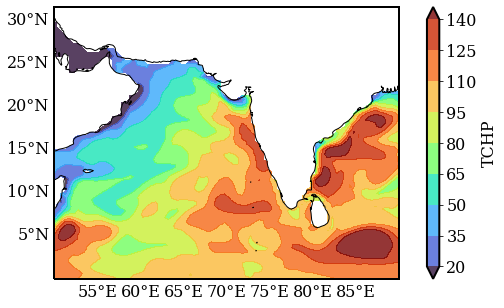

In [179]:
fig = plt.figure(figsize=[10,5])
ax = plt.subplot(projection=ccrs.PlateCarree())
tchp2021['TCHP'].sel(TIME=slice('2021-05-07','2021-05-13')).mean('TIME').plot.contourf(
    levels=range(20,150,15),cmap='turbo',alpha=0.8)
ax.coastlines(); ax.set_extent([50,90,0,30])
decorat(ax,b=True,l=True)

# NOAA Data

## Wind

In [21]:
noa_w = xr.open_mfdataset('wind_noaa/*2021*nc')

In [22]:
nua = (noa_w['uwnd']-noa_w['uwnd'].mean('time')).sel(time=slice('2021-05-07','2021-05-13'),
                                                     level=850).mean('time')
nva = (noa_w['vwnd']-noa_w['vwnd'].mean('time')).sel(time=slice('2021-05-07','2021-05-13'),
                                                     level=850).mean('time')

In [30]:
noa_w['uwnd'].sel(time=('2021-01-01')).time

<xarray.DataArray 'time' (time: 4)>
array(['2021-01-01T00:00:00.000000000', '2021-01-01T06:00:00.000000000',
       '2021-01-01T12:00:00.000000000', '2021-01-01T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 ... 2021-01-01T18:00:00
Attributes:
    long_name:      Time
    delta_t:        0000-00-00 06:00:00
    standard_name:  time
    axis:           T
    actual_range:   [1937256. 1946010.]

In [26]:
x,y = np.meshgrid(nua.lon,nua.lat)

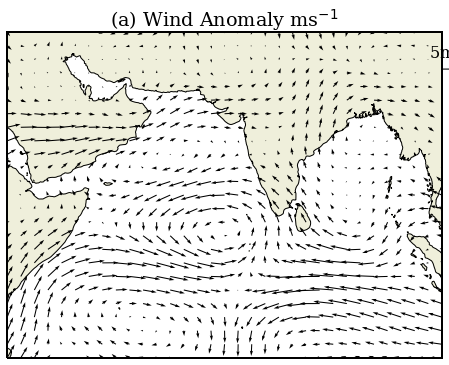

In [27]:
fig = plt.figure(figsize=[10,5])
ax = plt.subplot(projection=ccrs.PlateCarree())
ax.coastlines(); ax.set_extent([40,100,-10,30])
Q = plt.quiver(x,y,nua.values,nva.values,regrid_shape=25)
plt.quiverkey(Q,0.82,0.85,U=10,label='5ms$^{-1}$',coordinates='figure',labelpos='N',zorder=1)
ax.add_feature(cfeat.LAND,)
decorat(ax)
plt.tight_layout()
ax.set_title('(a) Wind Anomaly ms$^{-1}$')
plt.show()

## Vorticity

In [26]:
uwnd1 = xr.open_dataset('olr_noaa/850uwnd-1990-2021.nc')
vwnd1 = xr.open_dataset('olr_noaa/850vwnd-1990-2021.nc')

In [31]:
uwnd1.sel(time=('2021-01-01')).time

<xarray.DataArray 'time' ()>
array('2021-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2021-01-01
    level    float32 850.0
Attributes:
    long_name:           Time
    delta_t:             0000-00-01 00:00:00
    standard_name:       time
    axis:                T
    avg_period:          0000-00-01 00:00:00
    coordinate_defines:  start
    actual_range:        [1884648. 1893384.]

In [29]:
vo850 = mcal.vorticity(uwnd1['uwnd'],vwnd1['vwnd'])

In [30]:
vo850_anom = vo850-vo850.mean('time')

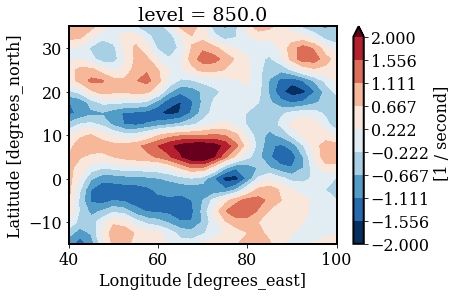

In [31]:
((10**5)*vo850_anom).sel(time=slice('2021-05-07','2021-05-13'),
                                       lon=slice(40,100),
                         lat=slice(35,-15)).mean('time').plot.contourf(levels=np.linspace(-2,2,10))

### Shear Anomaly

def vshear(ds,uwnd,vwnd,skip=False):
    if skip == True:
        pass
    else:
        if 850 in ds.level:
            if 200 in ds.level:
                pass
        else:
            raise ValueError('Level Missing')
    return xr.DataArray((((ds[uwnd].sel(level=200)-ds[uwnd].sel(level=850))**2) + ((ds[vwnd].sel(level=200)-ds[vwnd].sel(level=850))**2))**0.5,
                        attrs={'Name':'Wind Shear',
                              'levels': '200 minus 850',
                              'units':'ms$^{-1}$'})

In [32]:
Vs = (((noa_w.uwnd.sel(level=200)-noa_w.uwnd.sel(level=850))**2) + (
    (noa_w.vwnd.sel(level=200)-noa_w.vwnd.sel(level=850))**2))**0.5

In [33]:
Vsanom = Vs-Vs.mean('time')

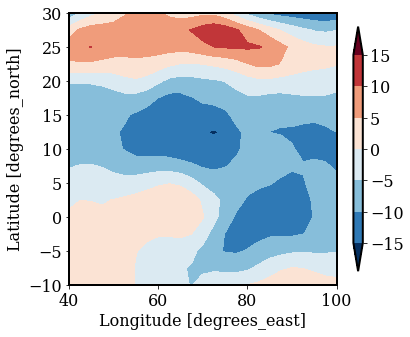

In [36]:
plt.figure(figsize=[6,5])
plt.subplot()
Vsanom.sel(time=slice('2021-05-07','2021-05-13')).mean('time').plot.contourf(xlim=(40,100),
                                                                             ylim=(-10,30),
                                                                             levels=np.arange(-15,16,5),
                                                                             extend='both',
                                                                            cbar_kwargs=cbarkgs,
                                                                            )

In [ ]:
np.arange(-15,16,5)

## Vertical Wind

In [37]:
w_ann = noa_w['omega']-noa_w['omega'].mean('time')

In [ ]:
# w_ann.sel(time=slice('2021-05-07','2021-05-13'),lat=slice(40,-10),lon=slice(40,100)).mean(
#     ['time','lat']).plot.contourf()
# plt.gca().invert_yaxis()

### Relative Humidity

In [38]:
rhds = xr.open_dataset('wind_noaa/rhum.2021.nc')

In [39]:
rh_anom = rhds['rhum']-rhds['rhum'].mean('time')

In [40]:
rh_anom_pre = rh_anom.sel(time=slice('2021-05-07','2021-05-13'),level=slice(1000,500)).mean(['time','level'])

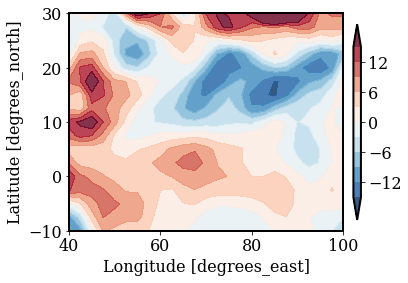

In [41]:
rh_anom_pre.plot.contourf(levels=np.arange(-15,16,3),
                         alpha=0.8,cbar_kwargs={'pad':.03,'extendfrac':.15,'shrink':0.9,'label':None},
                          xlim=(40,100),
                         ylim=[-10,30])

## Divergence

In [42]:
dvg = mcal.divergence(noa_w['uwnd'],noa_w['vwnd'])

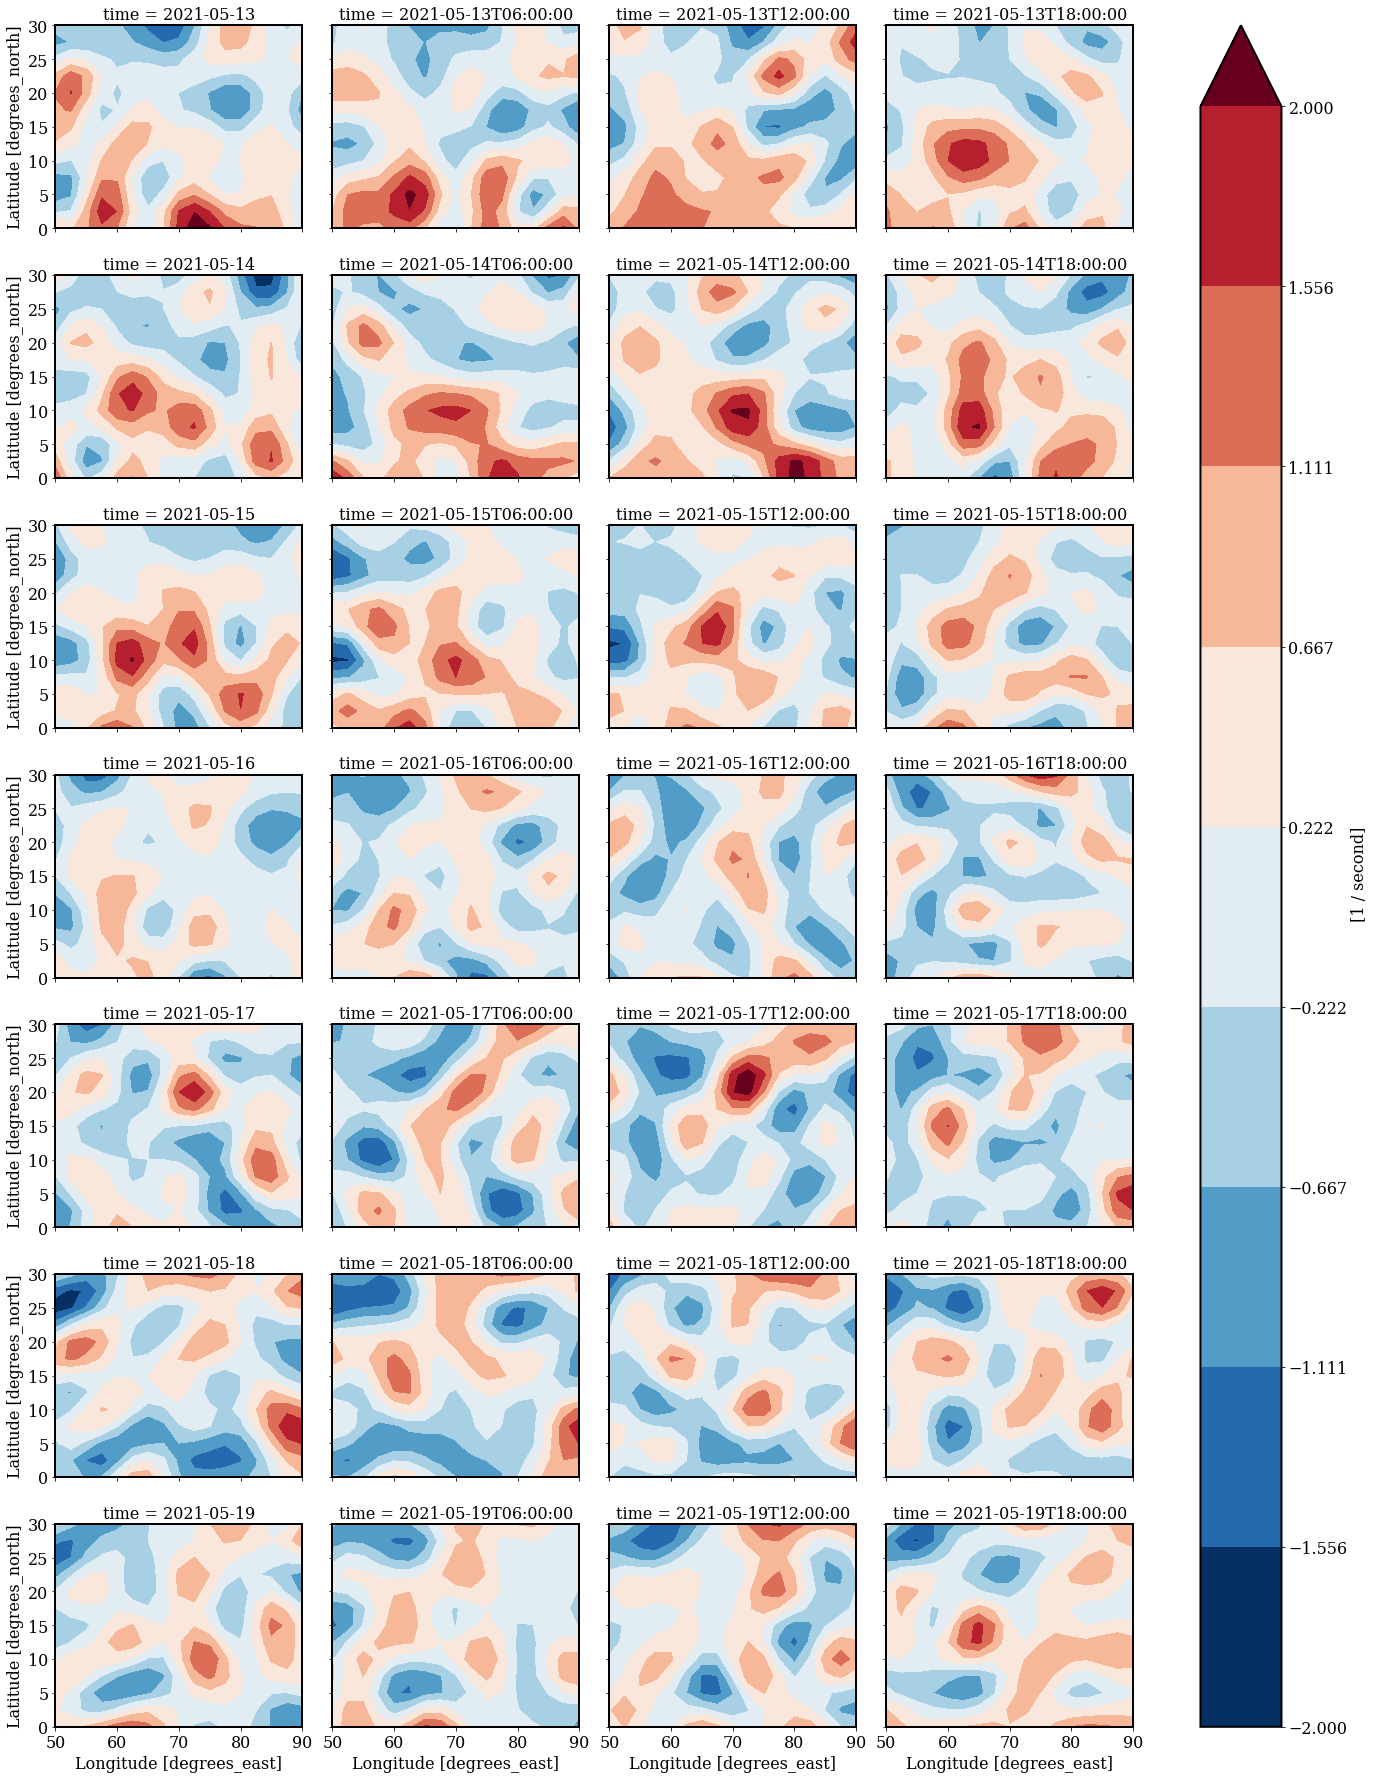

In [416]:
((10**5)*dvg).sel(level=200,
        lat=slice(30,0),
        lon=slice(50,90),
        time=slice('2021-05-13','2021-05-19')).plot.contourf(col="time",
                                                             col_wrap=4,
                                                             levels=np.linspace(-2,2,10),
                                                             figsize=[20,25])

### Tauktae

In [54]:
import scipy.stats as stats

In [55]:
def ttest(ds,start_date='2021-05-07',end_date='2021-05-13'):
    t,p = stats.ttest_ind(ds,ds.sel(time=slice(start_date,end_date)))
    return xr.Dataset(data_vars={'pval':(["lat", "lon"], p),
                            'tstat':(["lat","lon"],t),
                            },
                  coords={
                      "lon": ds.lon,
                      "lat": ds.lat,
                  })

In [56]:
sstanom = anom21.mean('time')
sstpanom = panom21.mean('time')

#### SST Ttest

In [57]:
sst_ttest = ttest(sstd['sst'],start_date='2021-05-07',end_date='2021-05-13')

In [58]:
sst_ttest_post = ttest(sstd['sst'],start_date='2021-05-20',end_date='2021-05-26')

#### Sla T Test

In [59]:
def ttest_sla(ds,start_date='2021-05-07',end_date='2021-05-13'):
    t,p = stats.ttest_ind(ds,ds.sel(time=slice(start_date,end_date)))
    return xr.Dataset(data_vars={'pval':(["latitude", "longitude"], p),
                            'tstat':(["latitude","longitude"],t),
                            },
                  coords={
                      "longitude": ds.longitude,
                      "latitude": ds.latitude,
                  })

In [60]:
sla_ttest = ttest_sla(sla['sla'],start_date='2021-05-07',end_date='2021-05-13')
sla_ttest_post = ttest_sla(sla['sla'],start_date='2021-05-20',end_date='2021-05-26')

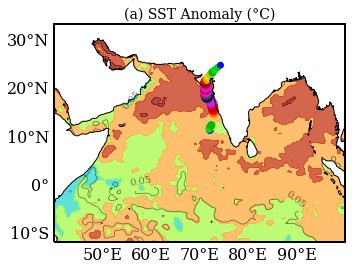

In [61]:
ax = plt.subplot(projection=ccrs.PlateCarree())
pl = ax.contourf(sstanom.lon,sstanom.lat,sstanom,cmap='turbo',extend='both',
                 levels=np.linspace(-2,2,6),
                 alpha=0.7)

pl2 = ax.scatter(tauk21.lon,tauk21.lat,tauk21.vmax,c=tauk21.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)

vt = sst_ttest.pval.plot.contour(levels=[0.05],colors='k',
                                    linewidths=0.8,
                                   alpha=0.5)
ax.clabel(vt,inline=True,fontsize=10,inline_spacing=-8,manual=[(60,5),(65,15),(90,0)],)
ax.set_title('(a) SST Anomaly (°C)',fontsize=14)
decorat(ax,l=True,b=True)
ax.coastlines()
ax.set_extent([40,100,-10,30])

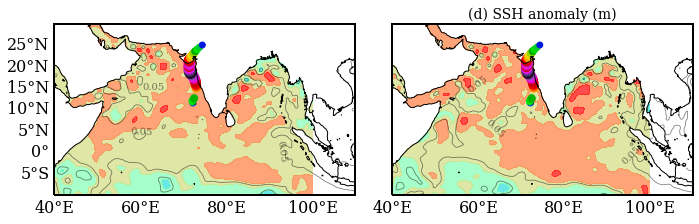

In [63]:
plt.figure(figsize=[10,6])
ax = plt.subplot(121,projection=ccrs.PlateCarree())
slapl = sla['sla'].sel(time=slice('2021-05-07','2021-05-13')).sel(
    latitude=slice(-10,40),
    longitude=slice(40,100)).mean(dim='time').plot.contourf(
    cmap='rainbow',levels=np.linspace(-0.3,0.3,6),
    extend='both',add_colorbar=False,alpha=0.7,ax=ax)
pl2 = ax.scatter(tauk21.lon,tauk21.lat,tauk21.vmax,c=tauk21.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)

ax.set_title('(c) SSH anomaly (m)',weight = 'normal',family='serif',size=14)
decorat(ax,l=True,b=True)
ax.coastlines()
vt = sla_ttest.pval.plot.contour(levels=[0.05],colors='k',
                                    linewidths=0.8,
                                   alpha=0.5)
ax.clabel(vt,inline=True,fontsize=10,inline_spacing=-8,manual=[(60,5),(65,15),(90,0)],)

ax = plt.subplot(122,projection=ccrs.PlateCarree())
slapl2 = sla['sla'].sel(time=slice('2021-05-20','2021-05-26')).sel(
    latitude=slice(-10,30),
    longitude=slice(40,100)).mean(dim='time').plot.contourf(
    cmap='rainbow',levels=np.linspace(-0.3,0.3,6),
    extend='both',add_colorbar=False,alpha=0.7,ax=ax)
vt = sla_ttest_post.pval.plot.contour(levels=[0.05],colors='k',
                                    linewidths=0.8,
                                   alpha=0.5)
ax.clabel(vt,inline=True,fontsize=10,inline_spacing=-8,manual=[(60,5),(65,15),(90,0)],)

decorat(ax,b=True)
pl2 = ax.scatter(tauk21.lon,tauk21.lat,tauk21.vmax,c=tauk21.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
ax.set_title('(d) SSH anomaly (m)',weight = 'normal',family='serif',size=14)
cbar1 = fig.colorbar(slapl,orientation='horizontal',shrink=0.6,pad=0.1)
ax.coastlines()
plt.tight_layout()

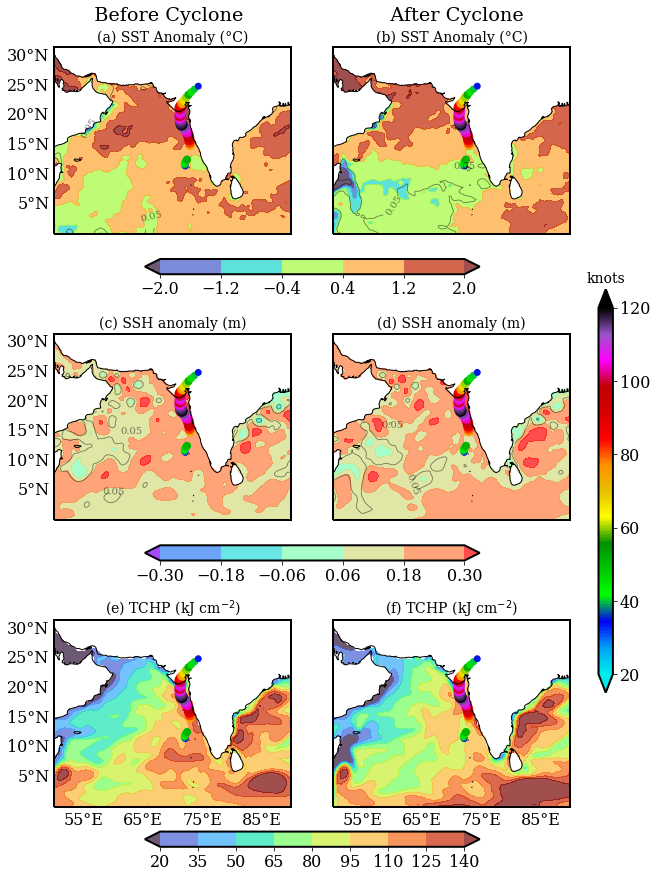

In [73]:
fig, axs = plt.subplots(nrows=3,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(10,14),constrained_layout=True)
plt.suptitle('  Before Cyclone                        After Cyclone',)
fig.subplots_adjust(hspace=0.15,wspace=0,top=0.94)
pl = axs[0,0].contourf(sstanom.lon,sstanom.lat,sstanom,cmap='turbo',extend='both',
                       levels=np.linspace(-2,2,6),alpha=0.7)
pl2 = axs[0,0].scatter(tauk21.lon,tauk21.lat,tauk21.vmax,c=tauk21.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)

decorat(axs[0,0],l=True)

vt = sst_ttest.pval.plot.contour(levels=[0.05],colors='k',
                                    linewidths=0.8,
                                   alpha=0.5,ax=axs[0,0])
axs[0,0].clabel(vt,inline=True,fontsize=10,inline_spacing=-8,manual=[(60,5),(65,15),(90,0)],)
axs[0,0].set_title('(a) SST Anomaly (°C)',fontsize=14)

pl = axs[0,1].contourf(sstpanom.lon,sstpanom.lat, sstpanom, cmap='turbo',extend='both',
                       levels=np.linspace(-2,2,6),alpha=0.7)
pl2 = axs[0,1].scatter(tauk21.lon,tauk21.lat,tauk21.vmax,c=tauk21.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)

vt = sst_ttest_post.pval.plot.contour(levels=[0.05],colors='k',
                                    linewidths=0.8,
                                   alpha=0.5,ax=axs[0,1])
axs[0,1].clabel(vt,inline=True,fontsize=10,inline_spacing=-8,manual=[(60,5),(65,15),(90,0)],)
axs[0,1].set_title('(b) SST Anomaly (°C)',fontsize=14)



# cbar_ax = fig.add_axes([0.25, 0.53, 0.5, 0.02],)#xywh
cbar1 = fig.colorbar(pl, ax = axs[0:1],orientation='horizontal',shrink=0.6,pad=0.1)

#SSH

slapl = sla['sla'].sel(time=slice('2021-05-07','2021-05-13')).mean(dim='time').plot.contourf(
    cmap='rainbow',levels=np.linspace(-0.3,0.3,6),
    extend='both',add_colorbar=False,alpha=0.7,ax=axs[1,0])
pl2 = axs[1,0].scatter(tauk21.lon,tauk21.lat,tauk21.vmax,c=tauk21.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
vt = sla_ttest.pval.plot.contour(levels=[0.05],colors='k',
                                    linewidths=0.8,
                                   alpha=0.5,
                                ax=axs[1,0])

axs[1,0].clabel(vt,inline=True,fontsize=10,inline_spacing=-8,manual=[(60,5),(65,15),(90,0)],)

axs[1,0].set_title('(c) SSH anomaly (m)',weight = 'normal',family='serif',size=14)
decorat(axs[1,0],l=True)
slapl2 = sla['sla'].sel(time=slice('2021-05-20','2021-05-26')).mean(dim='time').plot.contourf(
    cmap='rainbow',levels=np.linspace(-0.3,0.3,6),
    extend='both',add_colorbar=False,alpha=0.7,ax=axs[1,1])
pl2 = axs[1,1].scatter(tauk21.lon,tauk21.lat,tauk21.vmax,c=tauk21.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)


vt = sla_ttest_post.pval.plot.contour(levels=[0.05],colors='k',
                                      linewidths=0.8,
                                      alpha=0.5,
                                      ax = axs[1,1])
axs[1,1].clabel(vt,inline=True,fontsize=10,inline_spacing=-8,manual=[(60,5),(65,15),(90,0)],)
axs[1,1].set_title('(d) SSH anomaly (m)',weight = 'normal',family='serif',size=14)

cbar1 = fig.colorbar(slapl, ax = axs[1],orientation='horizontal',shrink=0.6,pad=0.1)

### TCHP

tchp2021['TCHP'].sel(TIME=slice('2021-05-07','2021-05-13')).mean('TIME').plot.contourf(
    levels=range(20,150,15),cmap='turbo',alpha=0.7,add_colorbar=False,ax=axs[2,0])
decorat(axs[2,0],b=True,l=True)
axs[2,0].set_title('(e) TCHP (kJ cm$^{-2}$)',weight = 'normal',family='serif',size=14)
pl2 = axs[2,0].scatter(tauk21.lon,tauk21.lat,tauk21.vmax,c=tauk21.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)

tcb = tchp2021['TCHP'].sel(TIME=slice('2021-05-20','2021-05-26')).mean('TIME').plot.contourf(
    levels=range(20,150,15),cmap='turbo',alpha=0.7,add_colorbar=False,ax=axs[2,1])

decorat(axs[2,1],b=True)

axs[2,1].set_title('(f) TCHP (kJ cm$^{-2}$)',weight = 'normal',family='serif',size=14)
cbar1 = fig.colorbar(tcb, ax = axs[2],orientation='horizontal',shrink=0.6,pad=0.1)
pl2 = axs[2,1].scatter(tauk21.lon,tauk21.lat,tauk21.vmax,c=tauk21.vmax,cmap='pyart_NWSRef',vmin=20,vmax=120,)
cbar2_ax = fig.add_axes([0.91, 0.3, 0.02, 0.4],)#lbwh
cbar1 = fig.colorbar(pl2, cax=cbar2_ax,extend='both',)
cbar1.ax.set_title('knots',fontsize=14)
# cbar1.set_label('SST anomaly (m)')

for ax in axs.flat:
    ax.coastlines()
    ax.set_extent([50,90,0,30])
for ax in axs.flat:
    ax.label_outer()
#     ax.set_aspect(1)
# fig.subplots_adjust(top=1) 
# plt.tight_layout(pad=1, w_pad=2, h_pad=1.0)

plt.savefig('anomalies_sst_ssh_and_tchp_Tauktae.png',dpi=300,bbox_inches='tight')

In [22]:
pre_mon = ['IO021975', 'IO021976', 'IO021977', 'IO021979','IO011984','IO021985','IO031987', 'IO011988', 'IO021996', 
'IO041996', 'IO031998','IO021999','IO012001','IO012002', 'IO012004',
'IO022007','IO022010','IO032010','IO012011','IO022014','IO012015','IO012018','IO022019','IO022020','AS012021']

In [23]:
pre_list = []
for i in range(len(pre_mon)):
    jj = hurdat_atl.get_storm(pre_mon[i]).to_xarray()
    pre_list.append(jj)

In [24]:
ace_no = []
ace_year = []
max_spd = []
for i in range(len(pre_list)):
    ace_no.append(pre_list[i].ace)
    ace_year.append(pre_list[i].year)
    max_spd.append(max(pre_list[i].vmax))

In [42]:
x = ace_year
y=np.array(ace_no)
z = np.polyfit(x,y,1)
p = np.poly1d(z)

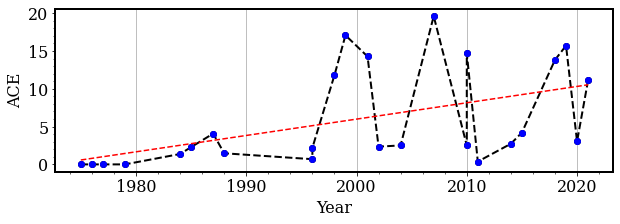

In [43]:
plt.figure(figsize=[10,3])
# ax = plt.subplot(211)
plt.xlabel('Year')
# # 
# # ax = plt.subplot(212)
# for i in range(len(pre_list)):
#     plt.scatter(pre_list[i].year,max(pre_list[i].vmax),s=100,c='b',)
# #     plt.annotate(np.around(pre_list[i].ace,2),
# #                  xy=[pre_list[i].year-1,max(pre_list[i].vmax)-5],size=8)
plt.grid('y',axis='x')
# # plt.scatter(pre_list[-1].year,max(pre_list[-1].vmax),c='r',s=200,ec='k')
# plt.twinx()
plt.ylabel('ACE')
plt.plot(ace_year,ace_no,'ko--',lw=2,)
plt.plot(ace_year,ace_no,'bo',lw=3,)
plt.minorticks_on()
plt.plot(ace_year,p(x),'r--')
# plt.savefig('ACE_trend_all_PMC.png',dpi=300,bbox_inches='tight')
plt.show()

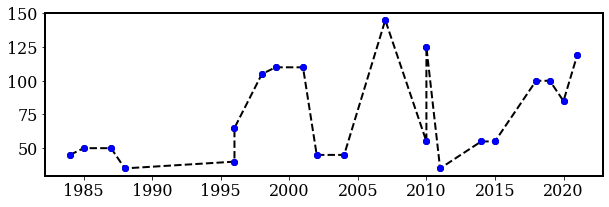

In [29]:
plt.figure(figsize=[10,3])
plt.plot(ace_year,max_spd,'ko--',lw=2,)
plt.plot(ace_year,max_spd,'bo',lw=3,)

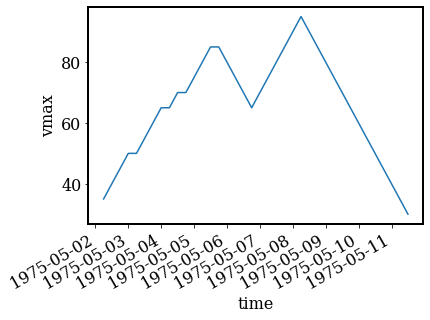

In [33]:
pre_list[0].vmax.plot()

In [54]:
pre_list[15].vmax

<xarray.DataArray 'vmax' (time: 32)>
array([ 15,  15,  15,  15,  30,  30,  30,  40,  45,  55,  55,  60,  65,
        70,  95, 120, 135, 145, 140, 135, 125, 115, 110,  90,  90,  75,
        65,  55,  45,  35,  25,  15])
Coordinates:
  * time     (time) datetime64[ns] 2007-05-31T06:00:00 ... 2007-06-08

In [ ]:
plt.figure(figsize=[10,3])
# ax = plt.subplot(211)
plt.xlabel('Year')
# # 
# # ax = plt.subplot(212)
# for i in range(len(pre_list)):
#     plt.scatter(pre_list[i].year,max(pre_list[i].vmax),s=100,c='b',)
# #     plt.annotate(np.around(pre_list[i].ace,2),
# #                  xy=[pre_list[i].year-1,max(pre_list[i].vmax)-5],size=8)
plt.grid('y',axis='x')
# # plt.scatter(pre_list[-1].year,max(pre_list[-1].vmax),c='r',s=200,ec='k')
# plt.twinx()
plt.ylabel('ACE')
plt.plot(ace_year,ace_no,'ko--',lw=2,)
plt.plot(ace_year,ace_no,'bo',lw=3,)
plt.minorticks_on()
plt.plot(ace_year,p(x),'r--')
# plt.savefig('ACE_trend_all_PMC.png',dpi=300,bbox_inches='tight')
plt.show()

## OLR

OLR data from noaa, filtered by using Carl Shreck's configuration

In [43]:
olrfil = xr.open_dataset('olr_noaa/mjo_fil_days.nc')

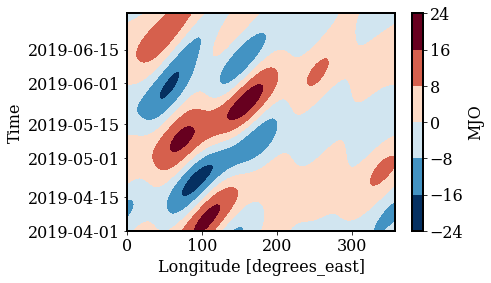

In [811]:
olrfil['MJO'].sel(time=slice('2019-04-01','2019-06-30'),lat=slice(-10,10)).mean('lat').plot.contourf()

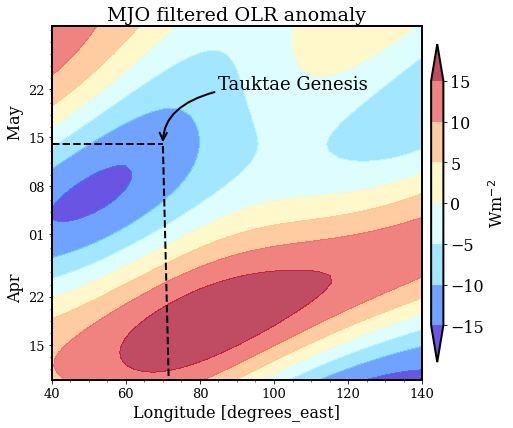

In [46]:
plt.figure(figsize=[8,6.5])
ax = plt.subplot()
olrfil['MJO'].sel(time=slice('2021-04-01','2021-05-31'),lon=slice(40,180),
        lat=slice(-5,5)).mean('lat').plot.contourf(x='lon',
                                                   levels=np.arange(-15,16,5),
                                                   extend='both',
                                                   cmap='pyart_BuDRd12',
                                                   alpha=0.7,
                                                   cbar_kwargs={'pad':.02,
                                                                'extendfrac':.15,
                                                                'shrink':0.9,
                                                                'label':'Wm$^{-2}$'}
                                                  )

ax.plot(np.array([40,70]),[np.datetime64('2021-05-14'),
                           np.datetime64('2021-05-14')],'k--',lw=2)

ax.plot(np.array([72,70]),[np.datetime64('2021-04-01'), np.datetime64('2021-05-14')],'k--',lw=2)
ax.annotate('Tauktae Genesis',xy=[70,np.datetime64('2021-05-14')],
            xytext=(85, np.datetime64('2021-05-22')),
            arrowprops=dict(arrowstyle="->", 
                            connectionstyle="angle3,angleA=0,angleB=90",
                            lw=2),size=18)
ax.set_title('MJO filtered OLR anomaly')
# plt.gca().invert_yaxis()
plt.ylim('2021-04-10','2021-05-31')
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.ylabel('Apr                          May')
plt.yticks(size=13);plt.xticks(size=13)
plt.minorticks_on()
plt.xlim(40,140)
# plt.savefig('MJO_Filtered.jpg',dpi=300,bbox_inches='tight')
plt.savefig('MJO_Filtered.png',dpi=300,bbox_inches='tight')
plt.show()

In [35]:
cbarkgs = {'extendfrac':.15,'shrink':0.9,'label':None}

In [1550]:
plt.rcParams['font.size'] = 15

In [1816]:
np.arange(-20,21,2)

array([-20, -18, -16, -14, -12, -10,  -8,  -6,  -4,  -2,   0,   2,   4,
         6,   8,  10,  12,  14,  16,  18,  20])

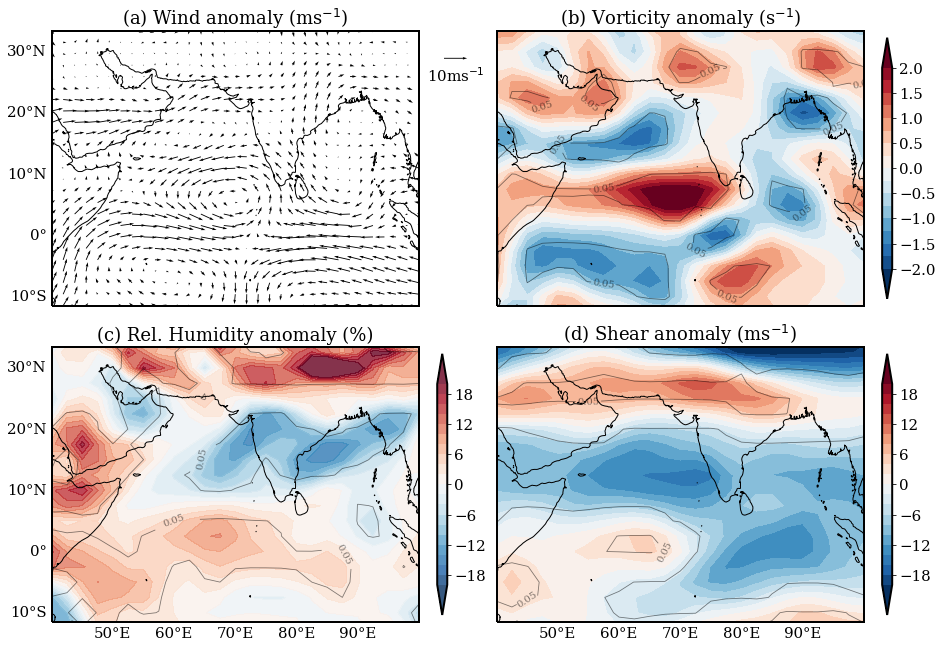

In [1817]:
x,y = np.meshgrid(nua.lon,nua.lat)
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(13,9),constrained_layout=True)
# fig.subplots_adjust(hspace=0.15,wspace=0.2,top=0.94)
axs[0,0].coastlines();axs[0,0].set_extent([40,100,-10,30])
Q = axs[0,0].quiver(x,y,nua.values,nva.values,regrid_shape=25,)
axs[0,0].quiverkey(Q,1.1,0.9,U=10,label='10ms$^{-1}$',coordinates='axes',labelpos='S',zorder=1)
decorat(axs[0,0],l=True)
axs[0,0].set_title('(a) Wind anomaly (ms$^{-1}$)')

((10**5)*vo850_anom).sel(time=slice('2021-05-07','2021-05-13'),
                                       lon=slice(40,100),
                         lat=slice(35,-15)).mean('time').plot.contourf(levels=np.linspace(-2,2,17),
                                                                       ax=axs[0,1],extend='both',
                                                                       cbar_kwargs=cbarkgs,)
vt = ttest(vo850).pval.plot.contour(levels=[0.05],colors='k',xlim=(40,100),ylim=(-10,30),
                                    linewidths=0.8,
                                   alpha=0.5,ax=axs[0,1])
axs[0,1].clabel(vt,inline=True,fontsize=10,inline_spacing=-2)
axs[0,1].set_title('(b) Vorticity anomaly (s$^{-1}$)')
axs[0,1].coastlines();axs[0,1].set_extent([40,100,-10,30])

rh_anom_pre.plot.contourf(levels=np.arange(-20,21,2),
                         alpha=0.8,cbar_kwargs=cbarkgs,ax=axs[1,0],extend='both')

ct = pval['pval'].plot.contour(colors='k',levels=[0.05,],linewidths=0.8,alpha=0.5,ax=axs[1,0])

clb = axs[1,0].clabel(ct,inline=True,fontsize=10,manual=[(60,5),(65,15),(90,0)],
                inline_spacing=-8,)

decorat(axs[1,0],b=True,l=True)
axs[1,0].coastlines();axs[1,0].set_extent([40,100,-10,30])
axs[1,0].set_title('(c) Rel. Humidity anomaly (%)')
Vsanom.sel(time=slice('2021-05-07','2021-05-13')).mean('time').plot.contourf(levels=np.arange(-20,21,2),
                                                                             extend='both',
                                                                             cbar_kwargs=cbarkgs,
                                                                             ax=axs[1,1])
st = ttest(Vs).pval.plot.contour(levels=[0.05],colors='k',xlim=(40,100),ylim=(-10,30),
                                    linewidths=0.8,
                                   alpha=0.5,ax=axs[1,1])
axs[1,1].clabel(st,inline=True,fontsize=10,inline_spacing=-2)


axs[1,1].set_title('(d) Shear anomaly (ms$^{-1}$)')
axs[1,1].coastlines();axs[1,1].set_extent([40,100,-10,30])
decorat(axs[1,1],b=True)
# for ax in axs.flat:
#     ax.coastlines()
#     ax.set_extent([40,90,-9,28])
#     ax.set_aspect(1)
# fig.subplots_adjust(top=1) 
# plt.tight_layout(pad=1)

plt.savefig('anomalies2.png',dpi=300,bbox_inches='tight')

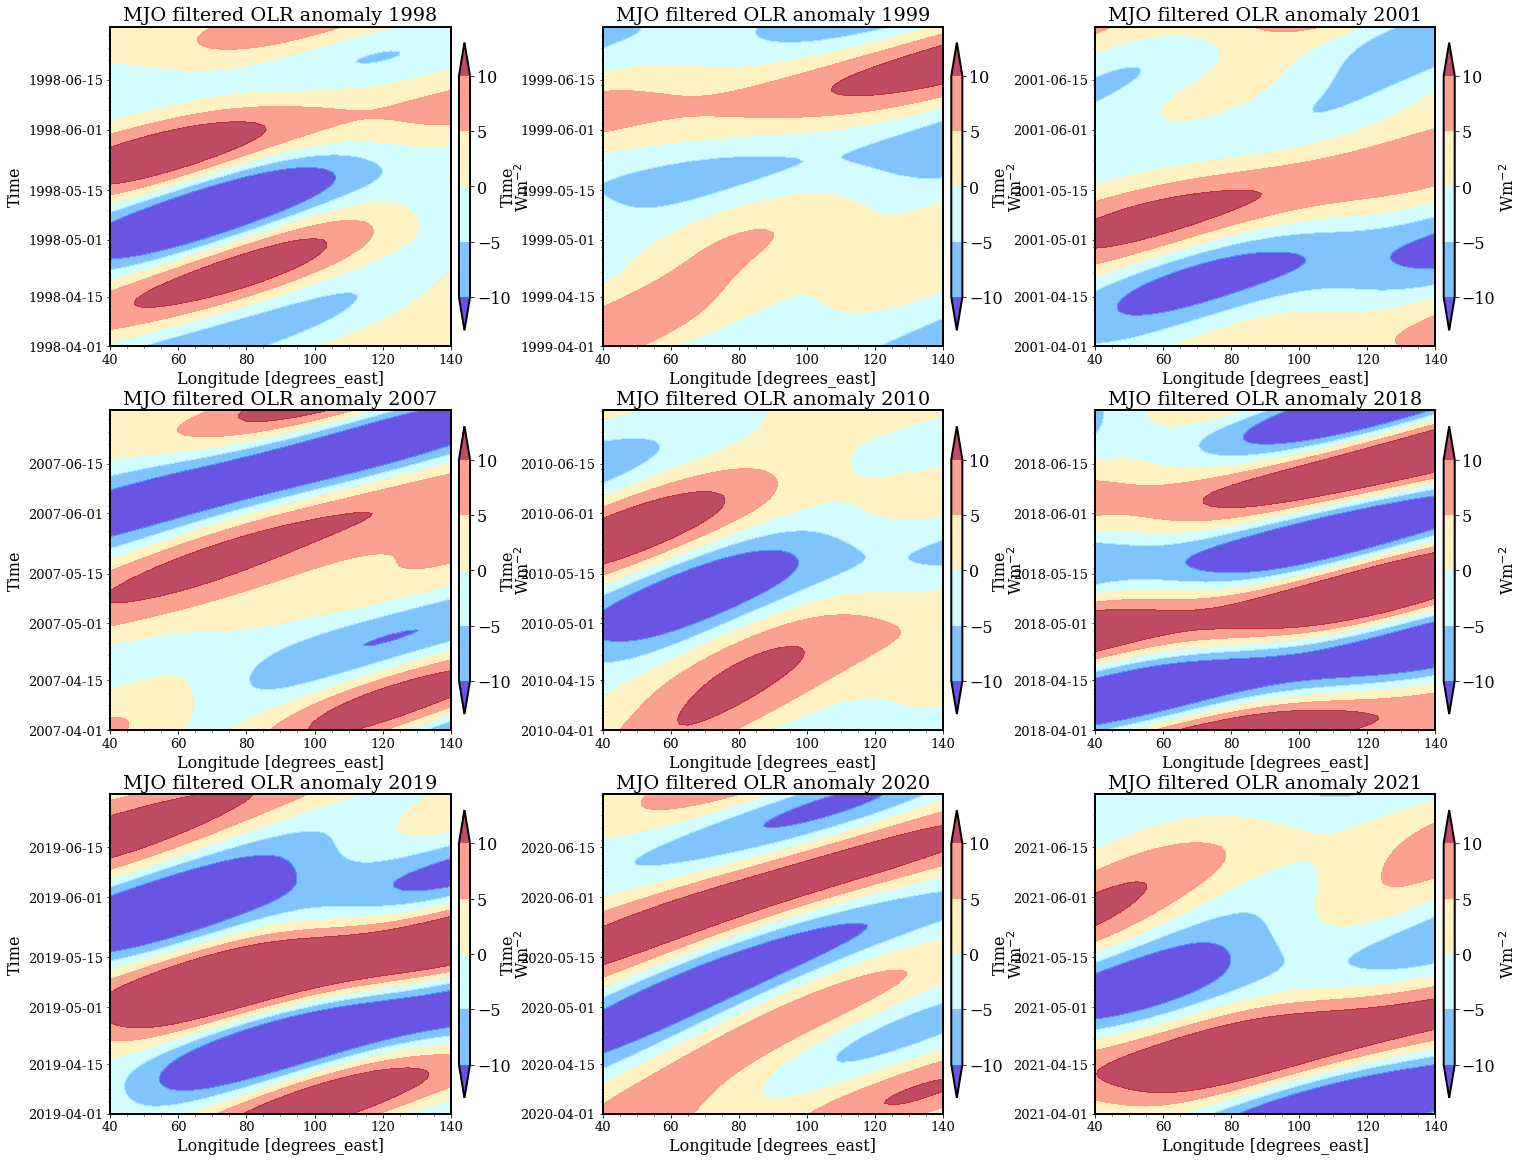

In [1045]:
fig = plt.figure(figsize=[25,20])
for a,j in enumerate(sorted([2021,2020,2019,2018,2010,2007,2001,1999,1998])):
    ax=plt.subplot(3,3,a+1)
    olrfil['MJO'].sel(time=slice(str(j)+'-04-01',str(j)+'-06-30'),lon=slice(40,180),
            lat=slice(-5,5)).mean('lat').plot.contourf(
        x='lon',levels=np.arange(-10,11,5),extend='both',cmap='pyart_BuDRd12',alpha=0.7,
        cbar_kwargs={'pad':.02,'extendfrac':.15,'shrink':0.9,'label':'Wm$^{-2}$'})
#     ax.plot(np.array([40,70]),[np.datetime64('2021-05-14'),
#                                np.datetime64('2021-05-14')],'k--',lw=2)
#     ax.plot(np.array([72,70]),[np.datetime64('2021-04-01'), np.datetime64('2021-05-14')],'k--',lw=2)
#     ax.annotate('Tauktae Genesis',xy=[70,np.datetime64('2021-05-14')],
#                 xytext=(85, np.datetime64('2021-05-22')),
#                 arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=90",lw=2),size=18)
    ax.set_title('MJO filtered OLR anomaly'+' '+ str(j))
    # plt.gca().invert_yaxis()
    plt.ylim(str(j)+'-04-01',str(j)+'-06-30')
#     plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%d'))
#     plt.ylabel('Apr                           May')
    plt.yticks(size=13);plt.xticks(size=13)
    plt.minorticks_on()
    plt.xlim(40,140)
plt.show()

In [1029]:
def rmm_background(ax,opt=0):
    fsize=12
    ax.plot([-4,4],[-4,4],linewidth=0.2,linestyle='--',color='k')
    ax.plot([-4,4],[4,-4],linewidth=0.2,linestyle='--',color='k')
    ax.plot([-4,4],[0,0],linewidth=0.2,linestyle='--',color='k')
    ax.plot([0,0],[-4,4],linewidth=0.2,linestyle='--',color='k')
#     if opt:
#         axislim = 4
#     else:
#         axislim = 2
    axislim = 4
    ax.set_xlim([-axislim,axislim])
    ax.set_ylim([-axislim,axislim])
    
    # circle in the center of the plot to denote weak index  
    circle = plt.Circle((0, 0), radius=1, fc='w', ec='k',linewidth=2, alpha=0.2,fill=False,)
    ax.add_patch(circle)
    # plt.Circle((0, 0), 1, color='r',fill=False)
    ax.text(-axislim, -3/4*axislim,  r'Phase 1', fontsize=fsize,rotation=-90)
    ax.text(-3/4*axislim, -axislim+0.05,  r'Phase 2', fontsize=fsize)
    ax.text(1/4*axislim, -axislim+0.05,   r'Phase 3', fontsize=fsize) 
    ax.text(axislim-0.2, -3/4*axislim, r'Phase 4', fontsize=fsize,rotation=90)
    ax.text(axislim-0.2, 1/4*axislim,   r'Phase 5', fontsize=fsize,rotation=90)
    ax.text(1/4*axislim, axislim-0.2,  r'Phase 6', fontsize=fsize)
    ax.text(-3/4*axislim, axislim-0.2, r'Phase 7', fontsize=fsize)
    ax.text(-axislim, 1/4*axislim,   r'Phase 8', fontsize=fsize,rotation=-90)
    ax.set_xlabel('RMM1')
    ax.set_ylabel('RMM2')
    ax.minorticks_on()
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.text(-0.4,-3.9, 'Indian\nOcean')
    ax.text(-0.5,3.3, 'Western\n Pacific')
    ax.text(3.2,-0.9, 'Martime\nContinent',rotation=90)
    ax.text(-3.9,-1.5, 'West. Hems.\nand Africa',rotation=270)
    return ax

In [1030]:
m214 = xj.sel(index = slice('2021-04-01','2021-04-30'))
m215 = xj.sel(index = slice('2021-05-01','2021-05-31'))
m216 = xj.sel(index = slice('2021-06-01','2021-06-30'))

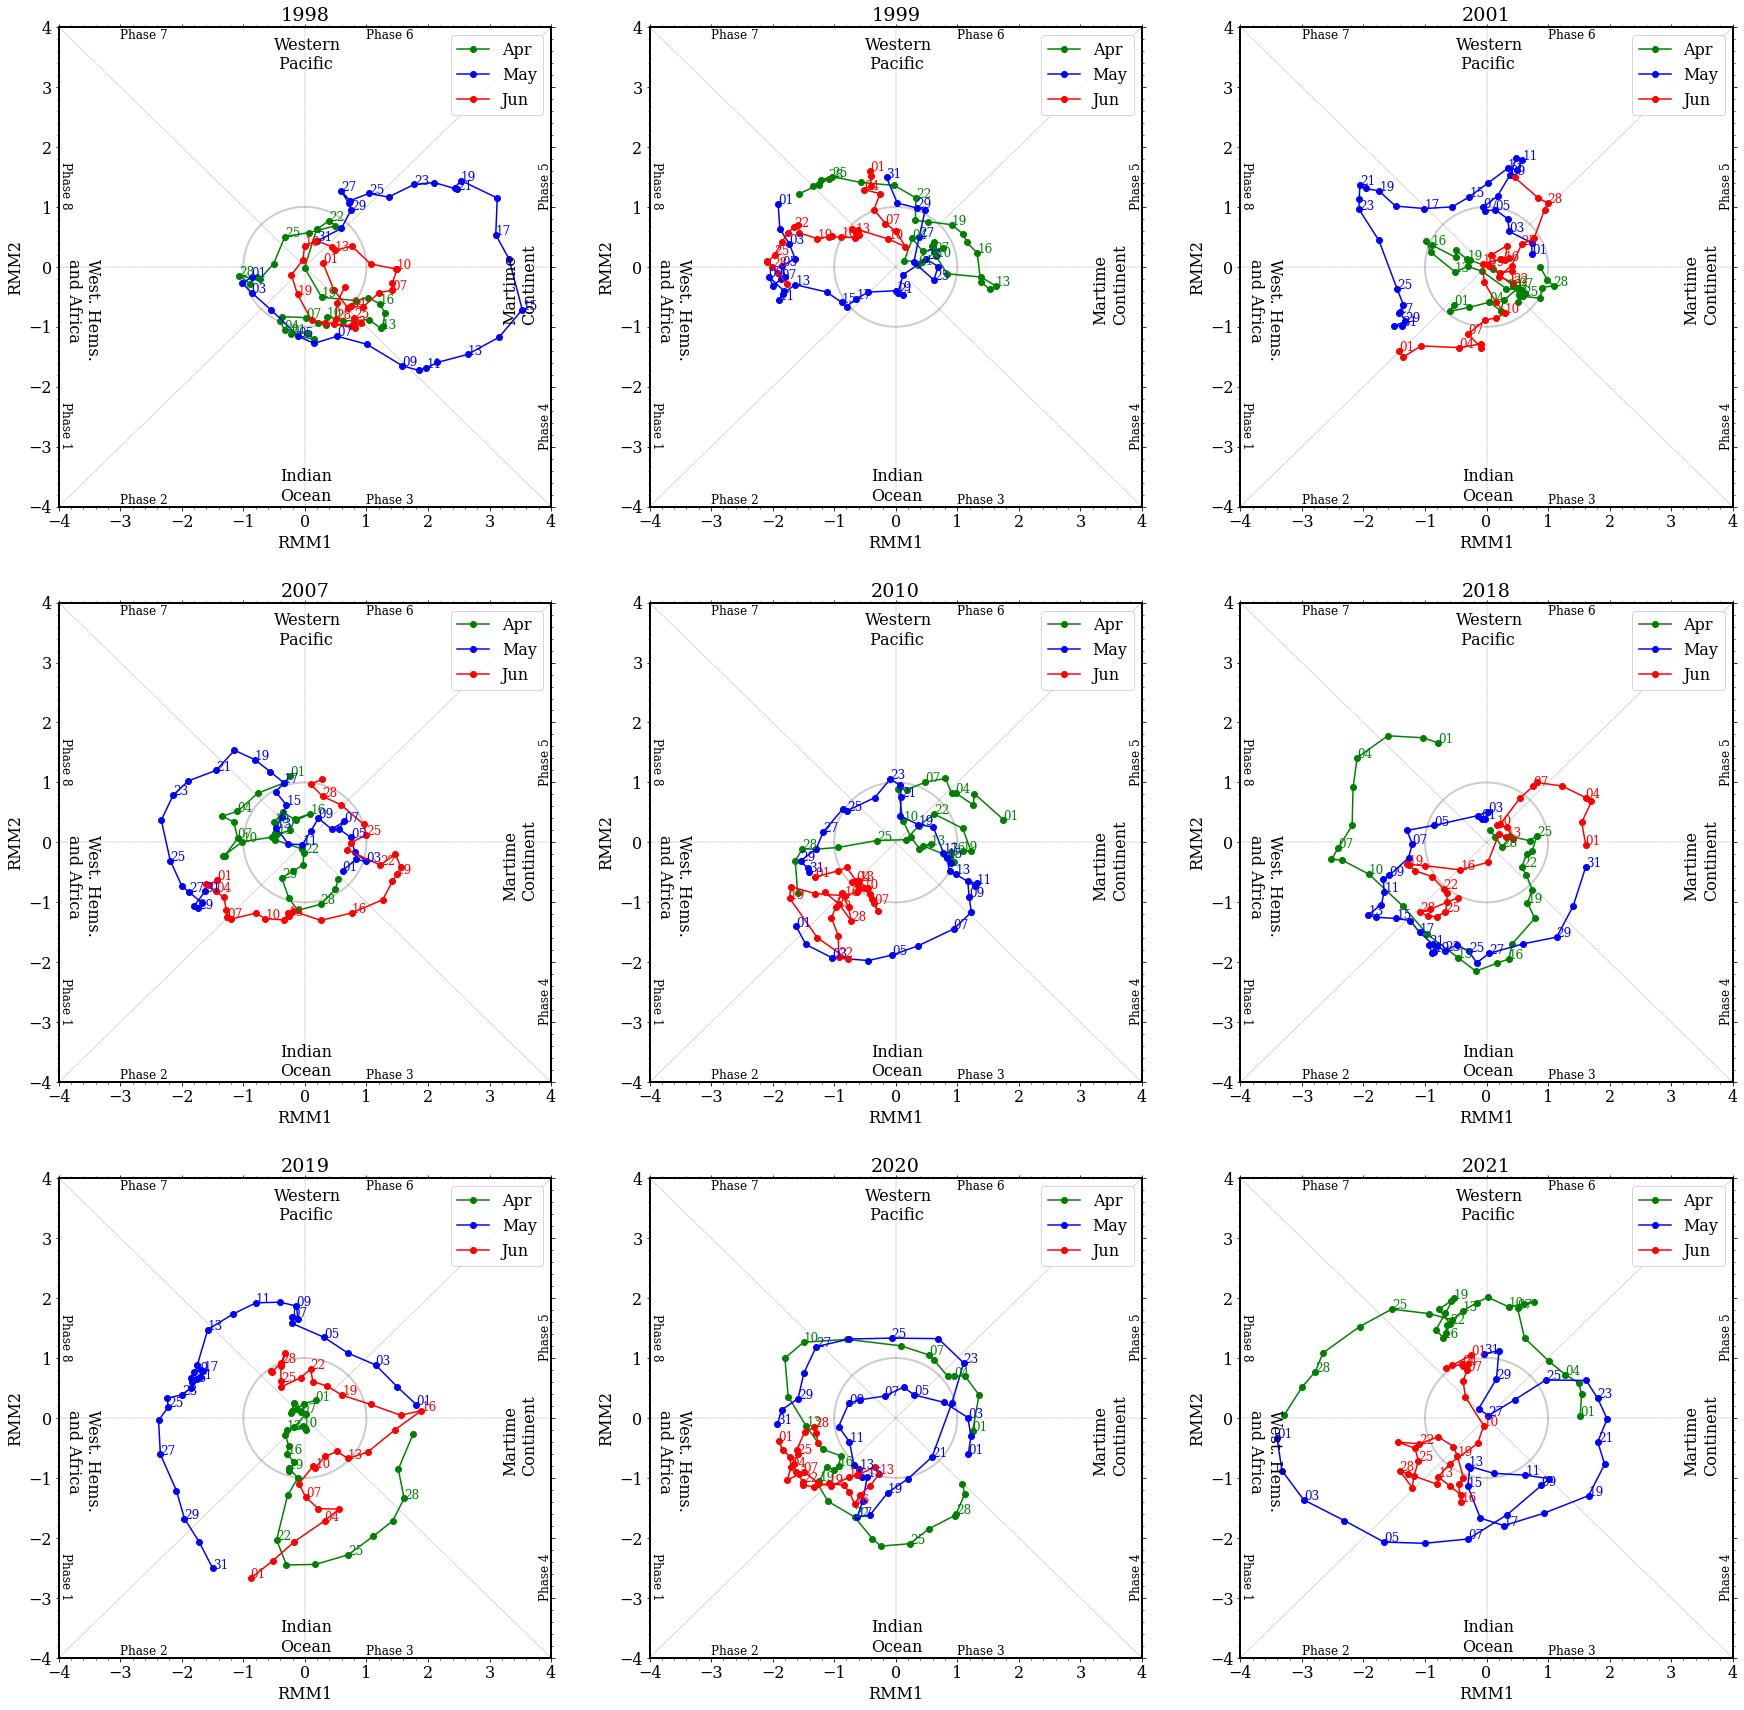

In [1042]:
fig = plt.figure(figsize=[30,30])
for a,j in enumerate(sorted([2021,2020,2019,2018,2010,2007,2001,1999,1998])):
    ax=plt.subplot(3,3,a+1)
    rmm_background(ax)
    plt.plot(xj.sel(index = slice(str(j)+'-04-01',str(j)+'-04-30'))['RMM1'],xj.sel(index = slice(str(j)+'-04-01',str(j)+'-04-30'))['RMM2'],'g-o',label='Apr')
    plt.plot(xj.sel(index = slice(str(j)+'-05-01',str(j)+'-05-31'))['RMM1'],xj.sel(index = slice(str(j)+'-05-01',str(j)+'-05-31'))['RMM2'],'b-o',label='May')
    plt.plot(xj.sel(index = slice(str(j)+'-06-01',str(j)+'-06-30'))['RMM1'],xj.sel(index = slice(str(j)+'-06-01',str(j)+'-06-30'))['RMM2'],'r-o',label='Jun')
    for i in range(0,len(xj.sel(index = slice(str(j)+'-04-01',str(j)+'-04-30'))['RMM1']),3):
        plt.annotate(str(xj.sel(index = slice(str(j)+'-04-01',str(j)+'-04-30')).index[i].values).split(sep='T')[0].split(sep='-')[-1],
                     xy=[xj.sel(index = slice(str(j)+'-04-01',str(j)+'-04-30'))['RMM1'][i],xj.sel(index = slice(str(j)+'-04-01',str(j)+'-04-30'))['RMM2'][i]], c='g',size=12)

    for i in range(0,len(xj.sel(index = slice(str(j)+'-05-01',str(j)+'-05-31'))['RMM1']),2):
        plt.annotate(str(xj.sel(index = slice(str(j)+'-05-01',str(j)+'-05-31')).index[i].values).split(sep='T')[0].split(sep='-')[-1],
                     xy=[xj.sel(index = slice(str(j)+'-05-01',str(j)+'-05-31'))['RMM1'][i],xj.sel(index = slice(str(j)+'-05-01',str(j)+'-05-31'))['RMM2'][i]], c='b',size=12)

    for i in range(0,len(xj.sel(index = slice(str(j)+'-06-01',str(j)+'-06-30'))['RMM1']),3):
        plt.annotate(str(xj.sel(index = slice(str(j)+'-06-01',str(j)+'-06-30')).index[i].values).split(sep='T')[0].split(sep='-')[-1],
                     xy=[xj.sel(index = slice(str(j)+'-06-01',str(j)+'-06-30'))['RMM1'][i],xj.sel(index = slice(str(j)+'-06-01',str(j)+'-06-30'))['RMM2'][i]],c='r',size=12)
    plt.legend()
    plt.title(str(j)+'')
plt.savefig('mjo_phase.jpg',dpi=100,bbox_inches='tight')
plt.show()

    

## Ttest

### Relative Humidity

In [1265]:
rhavg = rhds['rhum'].sel(level=slice(1000,500)).mean(['level'])

In [1266]:
rhcy = rhds['rhum'].sel(level=slice(1000,500),time=slice('2021-05-07','2021-05-13')).mean(['level'])

In [1267]:
rhavg.shape,rhcy.shape

((1460, 73, 144), (28, 73, 144))

In [1390]:
stat,pval = stats.ttest_ind(rhavg,rhcy)

In [1393]:
pval = xr.Dataset(data_vars={'pval':(["lat", "lon"], pval),
                            'stat':(["lat","lon"],stat),
                            },
                  coords={
                      "lon": rhcy.lon,
                      "lat": rhcy.lat,
                  })
    

In [1342]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [1751]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'serif'

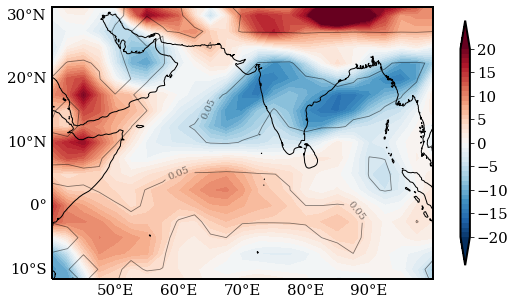

In [1752]:
plt.figure(figsize=[10,5])
ax = plt.subplot(projection=ccrs.PlateCarree())
rh_anom_pre.plot.contourf(levels=range(-20,21),extend='both',cbar_kwargs=cbarkgs)
ct = pval['pval'].plot.contour(colors='k',levels=[0.05,],linewidths=0.8,alpha=0.5)
clb = ax.clabel(ct,inline=True,fontsize=10,manual=[(60,5),(65,15),(90,0)],
                inline_spacing=-8,)
decorat(ax,l=True,b=True)
ax.minorticks_on()
# plt.colorbar(ct, orientation='horizontal',)
ax.set_extent([40,100,-10,28]);ax.coastlines()

In [1753]:
#rhds['rhum'].sel(level=slice(1000,500),time=).mean('level')#.to_netcdf('../junk/relhum2021.nc')

In [1754]:
#sig = xr.open_dataset('../junk/significancetest_relhum.nc')##ncl

In [1755]:
# plt.figure(figsize=[8,3])
# ax = plt.subplot(121)
# sig['w2'].where(sig.w2>=0.05).plot.contourf()
# ax = plt.subplot(122)
# pval['pval'].where(pval.pval>=0.05).plot.contourf(cmap='jet')

### Vorticity Test

In [1780]:
vo850.coords

Coordinates:
  * time     (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2021-12-31
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [1782]:
vo850.sel(time=slice('2021-05-07','2021-05-13'))

<xarray.DataArray (time: 7, lat: 73, lon: 144)>
<Quantity([[[            nan             nan             nan ...             nan
               nan             nan]
  [ 1.54660112e-05  9.66601174e-06  8.95302017e-06 ...  1.17602446e-05
    1.19840715e-05  1.22079015e-05]
  [ 3.57197926e-06  3.57197198e-06  3.14781415e-06 ...  7.43635902e-06
    5.80578180e-06  3.57200032e-06]
  ...
  [-9.91348989e-06 -7.67968085e-06 -5.91480025e-06 ... -1.61247491e-05
   -1.41808059e-05 -1.28400692e-05]
  [-1.30031373e-05 -1.13533429e-05 -8.58759310e-06 ... -2.02739277e-05
   -1.95162087e-05 -1.56795916e-05]
  [            nan             nan             nan ...             nan
               nan             nan]]

 [[            nan             nan             nan ...             nan
               nan             nan]
  [ 2.59306431e-06  4.64574415e-06  4.69051214e-06 ...  5.80641451e-06
    5.76163964e-06  9.77754841e-06]
  [ 5.91682897e-06  6.94416592e-06  6.43048101e-06 ...  9.69160028e-06
    8.48518212e-06  6.47525133e-06]
...
  [-8.33649745e-06 -5.97075026e-06 -4.11865657e-06 ... -1.16825519e-05
   -9.69615572e-06 -8.22346694e-06]
  [-3.44700118e-06 -3.98420335e-06 -3.71887685e-06 ... -9.77764229e-06
   -9.28850545e-06 -7.90740007e-06]
  [            nan             nan             nan ...             nan
               nan             nan]]

 [[            nan             nan             nan ...             nan
               nan             nan]
  [-9.96253521e-07 -5.62447468e-08  2.84695816e-06 ... -3.68232738e-06
   -3.76858867e-06 -4.97071328e-06]
  [-1.34224605e-05 -1.36887686e-05 -1.32622795e-05 ... -1.46995449e-05
   -1.53687563e-05 -1.67519199e-05]
  ...
  [ 3.24650530e-06  5.56750654e-06  6.86115537e-06 ...  4.59190261e-06
    5.32711058e-06  6.57597659e-06]
  [ 1.33784601e-05  2.10073653e-05  2.45756007e-05 ...  1.68637842e-05
    1.95399245e-05  2.52056043e-05]
  [            nan             nan             nan ...             nan
               nan             nan]]], '1 / second')>
Coordinates:
  * time     (time) datetime64[ns] 2021-05-07 2021-05-08 ... 2021-05-13
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [ ]:
def ttest(ds):
    t,p = stats.ttest_ind(ds,ds.sel(time=slice('2021-05-07','2021-05-13')))
    return xr.Dataset(data_vars={'pval':(["lat", "lon"], p),
                            'tstat':(["lat","lon"],t),
                            },
                  coords={
                      "lon": ds.lon,
                      "lat": ds.lat,
                  })

<a list of 142 text.Text objects>

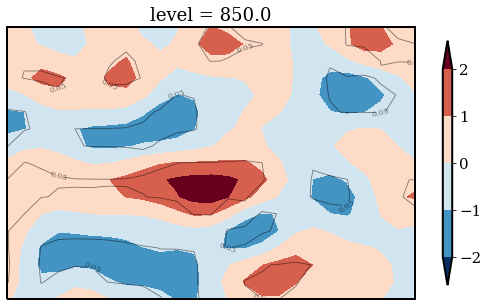

In [1802]:
plt.figure(figsize=[10,5])
ax = plt.subplot(projection=ccrs.PlateCarree())

((10**5)*vo850_anom).sel(time=slice('2021-05-07','2021-05-13')
                        ).mean('time').plot.contourf(extend='both',
                                                     cbar_kwargs=cbarkgs,
                                                    xlim=(40,100),ylim=(-10,30),
                                                    levels=range(-2,3))
vt = ttest(vo850).pval.plot.contour(levels=[0.05],colors='k',xlim=(40,100),ylim=(-10,30),
                                    linewidths=0.8,
                                   alpha=0.5,)
ax.clabel(vt,inline=True,fontsize=8,inline_spacing=-4)

### Shear Test

<a list of 61 text.Text objects>

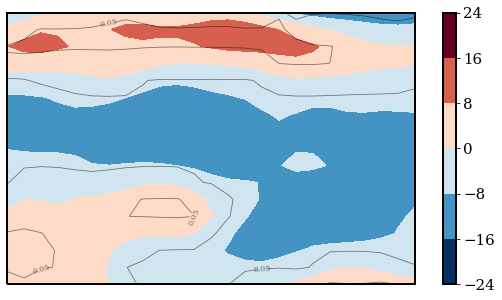

In [1835]:
plt.figure(figsize=[10,5])
ax = plt.subplot(projection=ccrs.PlateCarree())
Vsanom.sel(time=slice('2021-05-07','2021-05-13')).mean('time').plot.contourf(xlim=(40,100),ylim=(-10,30))
st = ttest(Vs).pval.plot.contour(levels=[0.05],colors='k',xlim=(40,100),ylim=(-10,30),
                                    linewidths=0.8,
                                   alpha=0.5,)
ax.clabel(st,inline=True,fontsize=8,inline_spacing=-4)

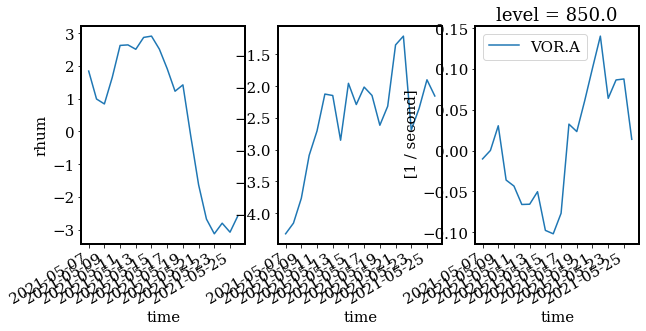

In [1836]:
plt.figure(figsize=[10,4])
ax = plt.subplot(131)
rh_anom.sel(level=slice(1000,500),lat=slice(30,-10),lon=slice(40,90),
            time=slice('2021-05-07','2021-05-26')).mean(['level','lat','lon']).resample(time='D').mean().plot(label='RH.A')
ax = plt.subplot(132)
Vsanom.sel(lat=slice(30,-10),lon=slice(40,90),
            time=slice('2021-05-07','2021-05-26')).mean(['lat','lon']).resample(time='D').mean().plot(label='SHR.A')
ax = plt.subplot(133)
((10**5)*vo850_anom).sel(lat=slice(30,-10),lon=slice(40,90),
            time=slice('2021-05-07','2021-05-26')).mean(['lat','lon']).resample(time='D').mean().plot(label='VOR.A')
# plt.title('RhA vs ShA vs VoA')
plt.legend()

In [45]:
import tropycal.tracks as tracks

In [ ]:
hurdat_atl = tracks.TrackDataset(basin='north_indian',source='ibtracs',include_btk=True)

--> Starting to read in ibtracs data
